# Covid-19 in Germany Analysis

In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

# Setting default plot sizes
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 12


demData = pd.read_csv('/content/drive/MyDrive/FinalProject/demographics_de.csv')
covidData = pd.read_csv('/content/drive/MyDrive/FinalProject/covid_de.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data Munging (Horace)

To clean the demographics dataset, we checked the state, gender, and age group columns by grouping them together. This would be able to show if there were NaN or improper values within the columns as they would show up as a separate group within the dataframe. 

As for the population column, a histogram was made over every row after finding the log to check if there were significant outliers.

dict_keys(['Baden-Wuerttemberg', 'Bayern', 'Berlin', 'Brandenburg', 'Bremen', 'Hamburg', 'Hessen', 'Mecklenburg-Vorpommern', 'Niedersachsen', 'Nordrhein-Westfalen', 'Rheinland-Pfalz', 'Saarland', 'Sachsen', 'Sachsen-Anhalt', 'Schleswig-Holstein', 'Thueringen'])
dict_keys(['female', 'male'])
dict_keys(['00-04', '05-14', '15-34', '35-59', '60-79', '80-99'])


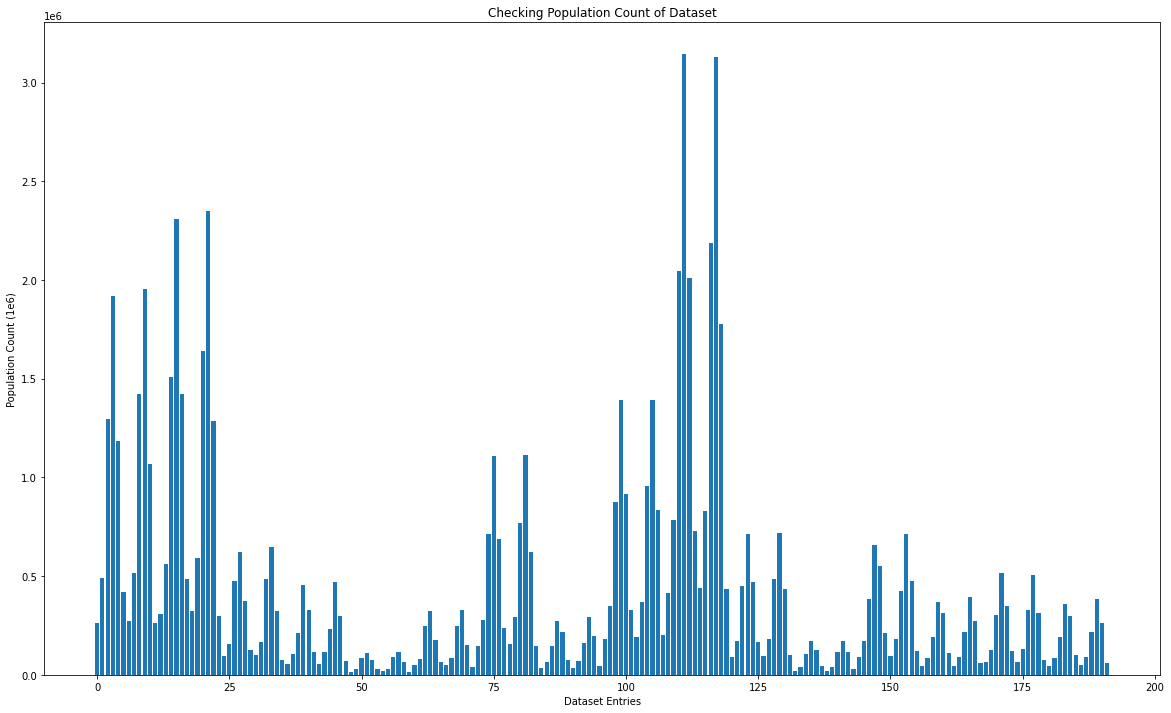

In [ ]:
# Cleaning Demographic Dataset

# Checking state column
checkState = demData.groupby('state')
print(checkState.groups.keys())

# Checking gender column
checkGender = demData.groupby('gender')
print(checkGender.groups.keys())

# Checking age group column
checkAge = demData.groupby('age_group')
print(checkAge.groups.keys())

# Checking population column
plt.bar(list(demData.index), demData['population'])
plt.xlabel("Dataset Entries")
plt.ylabel("Population Count (1e6)")
plt.title("Checking Population Count of Dataset")

# Logging population column
for val in range(len(demData["population"])):
  demData["population"][val] = np.log(demData["population"][val]) #log vals bc population is power law

To clean the covid dataset, we did the same thing as the demographics dataset, where we checked the state, county, age group, and gender columns by grouping them together to see if there was anything out of the ordinary. We then plotted the total cases, recovered, and deaths for each row in a histogram to check if there were significant outliers, and if there were, seeing if the max number of cases equaled the max number of recovered or deaths to check if the "outliers" made sense. If they made sense, then they were left alone, otherwise, they were removed.

dict_keys(['Baden-Wuerttemberg', 'Bayern', 'Berlin', 'Brandenburg', 'Bremen', 'Hamburg', 'Hessen', 'Mecklenburg-Vorpommern', 'Niedersachsen', 'Nordrhein-Westfalen', 'Rheinland-Pfalz', 'Saarland', 'Sachsen', 'Sachsen-Anhalt', 'Schleswig-Holstein', 'Thueringen'])
dict_keys(['LK Ahrweiler', 'LK Aichach-Friedberg', 'LK Alb-Donau-Kreis', 'LK Altenburger Land', 'LK Altenkirchen', 'LK Altmarkkreis Salzwedel', 'LK Altoetting', 'LK Alzey-Worms', 'LK Amberg-Sulzbach', 'LK Ammerland', 'LK Anhalt-Bitterfeld', 'LK Ansbach', 'LK Aschaffenburg', 'LK Augsburg', 'LK Aurich', 'LK Bad Duerkheim', 'LK Bad Kissingen', 'LK Bad Kreuznach', 'LK Bad Toelz-Wolfratshausen', 'LK Bamberg', 'LK Barnim', 'LK Bautzen', 'LK Bayreuth', 'LK Berchtesgadener Land', 'LK Bergstrasse', 'LK Bernkastel-Wittlich', 'LK Biberach', 'LK Birkenfeld', 'LK Bitburg-Pruem', 'LK Bodenseekreis', 'LK Boeblingen', 'LK Boerde', 'LK Borken', 'LK Breisgau-Hochschwarzwald', 'LK Burgenlandkreis', 'LK Calw', 'LK Celle', 'LK Cham', 'LK Cloppenburg

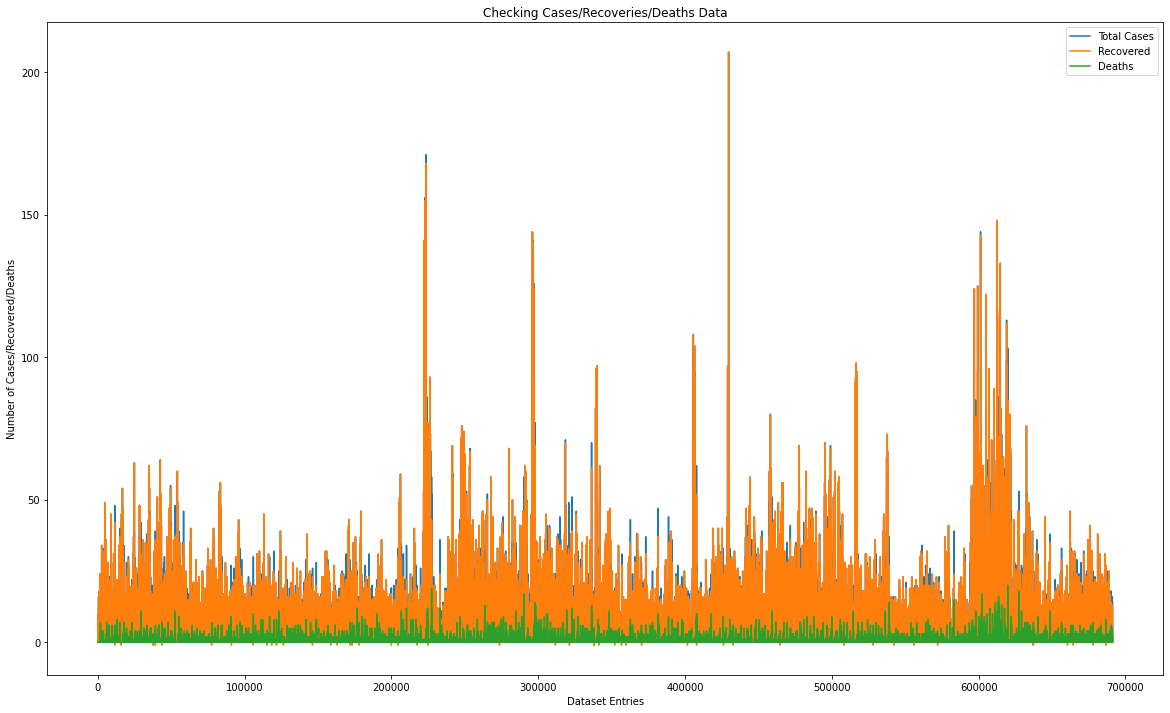

In [ ]:
# Cleaning Covid Dataset

# Checking state column
checkState = covidData.groupby('state')
print(checkState.groups.keys())

# Checking county column
checkCounty = covidData.groupby('county')
print(checkCounty.groups.keys())

# Checking age group column
checkAge = covidData.groupby('age_group')
print(checkAge.groups.keys())

# Checking gender column
checkGender = covidData.groupby('gender')
print(checkGender.groups.keys())

# Checking total cases, recovered, and deaths columns
covidData['cases'].plot(label='Total Cases')
covidData['recovered'].plot(label='Recovered')
covidData['deaths'].plot(label='Deaths')
plt.xlabel("Dataset Entries")
plt.ylabel("Number of Cases/Recovered/Deaths")
plt.title("Checking Cases/Recoveries/Deaths Data")
plt.legend()

# Just to make sure the maximum recovered (highest orange bar on chart) is equal to maximum cases which would make sense as the orange bar is covering the blue bar:
print("\033[1m" + "\nDoes the max cases equal the max recovered? " + str(max(covidData['recovered']) == max(covidData['cases'])) + "\n\033[0m")

### Which age/gender group has the highest covid positive cases? (Horace)

We looked at the age groups by themselves, and then the genders by themselves, and then we looked both gender and age groups combined.

In [ ]:
# Which age/gender group has the highest covid positive cases?

# Looking only at age groups
groupAge = covidData.groupby(['age_group'])['cases'].sum()
print(groupAge)
print("\033[1m" + "\nThe age group with the highest covid positive cases is between 35-59 with " + str(max(groupAge)) + " cases.\n" + "\033[0m")

# Looking only at gender
groupGender = covidData.groupby(['gender'])['cases'].sum()
print(groupGender)
print("\033[1m" + "\nThe gender with the highest covid positive cases are females with " + str(max(groupGender)) + " cases.\n" + "\033[0m")

# Looking at both gender and age groups
groupAgeAndGender = covidData.groupby(['age_group', 'gender'])['cases'].sum()
print(groupAgeAndGender)
print("\033[1m" + "\nThe gender and age group with the highest covid positive cases are females between 35-59 with " + str(max(groupAgeAndGender)) + " cases.\n" + "\033[0m")

age_group
00-04      64468
05-14     181086
15-34     842868
35-59    1110478
60-79     441773
80-99     266216
Name: cases, dtype: int64

The age group with the highest covid positive cases is between 35-59 with 1110478 cases.

gender
F    1509969
M    1379914
Name: cases, dtype: int64

The gender with the highest covid positive cases are females with 1509969 cases.

age_group  gender
00-04      F          30555
           M          33064
05-14      F          85334
           M          93746
15-34      F         419652
           M         416833
35-59      F         576107
           M         527653
60-79      F         221148
           M         218682
80-99      F         176129
           M          88848
Name: cases, dtype: int64

The gender and age group with the highest covid positive cases are females between 35-59 with 576107 cases.



### Which age/gender group has the highest covid death cases? (Horace)

We looked at the age groups by themselves, and then the genders by themselves, and then we looked both gender and age groups combined.

In [ ]:
# Which age/gender group has the highest covid death cases? 

# Looking only at age groups
groupAge = covidData.groupby(['age_group'])['deaths'].sum()
print(groupAge)
print("\033[1m" + "\nThe age group with the highest covid death cases is between 80-99 with " + str(max(groupAge)) + " cases.\n" + "\033[0m")

# Looking only at gender
groupGender = covidData.groupby(['gender'])['deaths'].sum()
print(groupGender)
print("\033[1m" + "\nThe gender with the highest covid death cases are males with " + str(max(groupGender)) + " cases.\n" + "\033[0m")

# Looking at both gender and age groups
groupAgeAndGender = covidData.groupby(['age_group', 'gender'])['deaths'].sum()
print(groupAgeAndGender)
print("\033[1m" + "\nThe gender and age group with the highest covid death cases are females between 80-99 with " + str(max(groupAgeAndGender)) + " cases.\n" + "\033[0m")

age_group
00-04        8
05-14        7
15-34      113
35-59     2657
60-79    21228
80-99    53370
Name: deaths, dtype: int64

The age group with the highest covid death cases is between 80-99 with 53370 cases.

gender
F    37356
M    39843
Name: deaths, dtype: int64

The gender with the highest covid death cases are males with 39843 cases.

age_group  gender
00-04      F             5
           M             3
05-14      F             4
           M             3
15-34      F            44
           M            69
35-59      F           807
           M          1845
60-79      F          7259
           M         13925
80-99      F         29230
           M         23992
Name: deaths, dtype: int64

The gender and age group with the highest covid death cases are females between 80-99 with 29230 cases.



### What is the covid death trend in Germany? (Nikhil)

Text(0.5, 1.0, 'Death Trend For Germany')

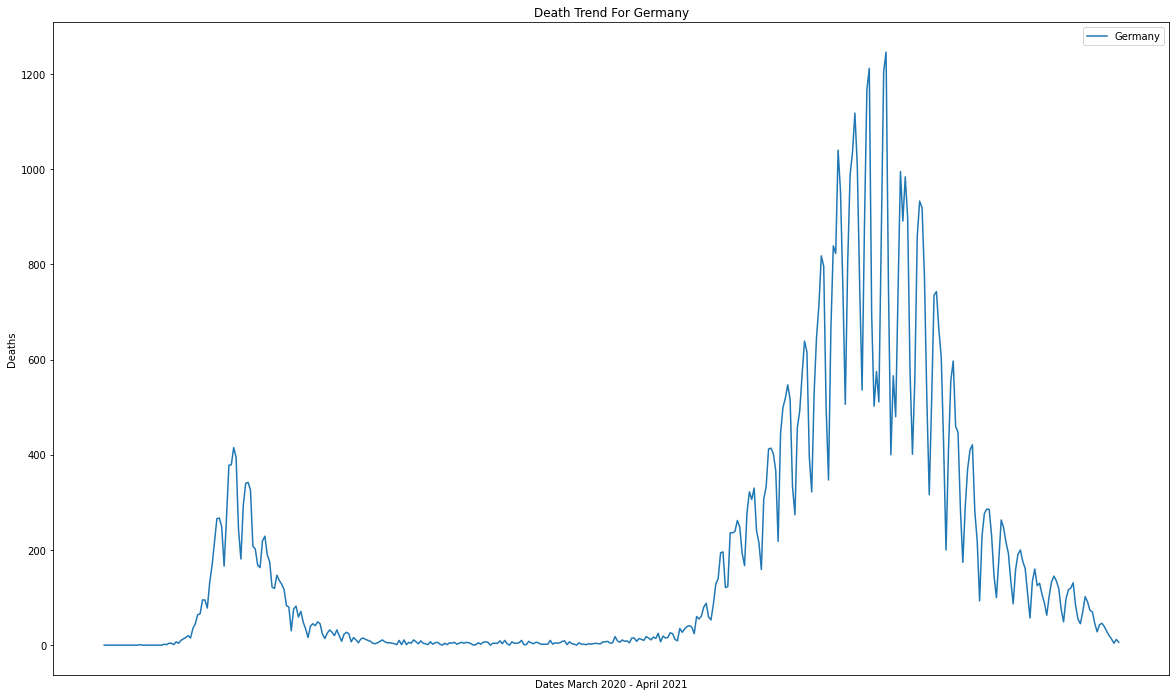

In [ ]:
Germany = covidData.groupby("date", as_index=False)["deaths"].sum() #get covid total dates

dates = Germany["date"] #date column
deaths = Germany["deaths"]  #deaths column


plt.plot(dates,deaths)  #plot data

#label graph
plt.xticks([], [])
plt.xlabel("Dates March 2020 - April 2021") 
plt.ylabel("Deaths")
plt.legend(["Germany"])
plt.title("Death Trend For Germany")



Covid Death trend in Germany has had a couple of major spikes. We can see that March 2021 was when the deaths were at it's peak and soon after it went back down.

### What is the covid cases trend in Germany? (Nikhil)

Text(0.5, 1.0, 'Cases Trend For Germany')

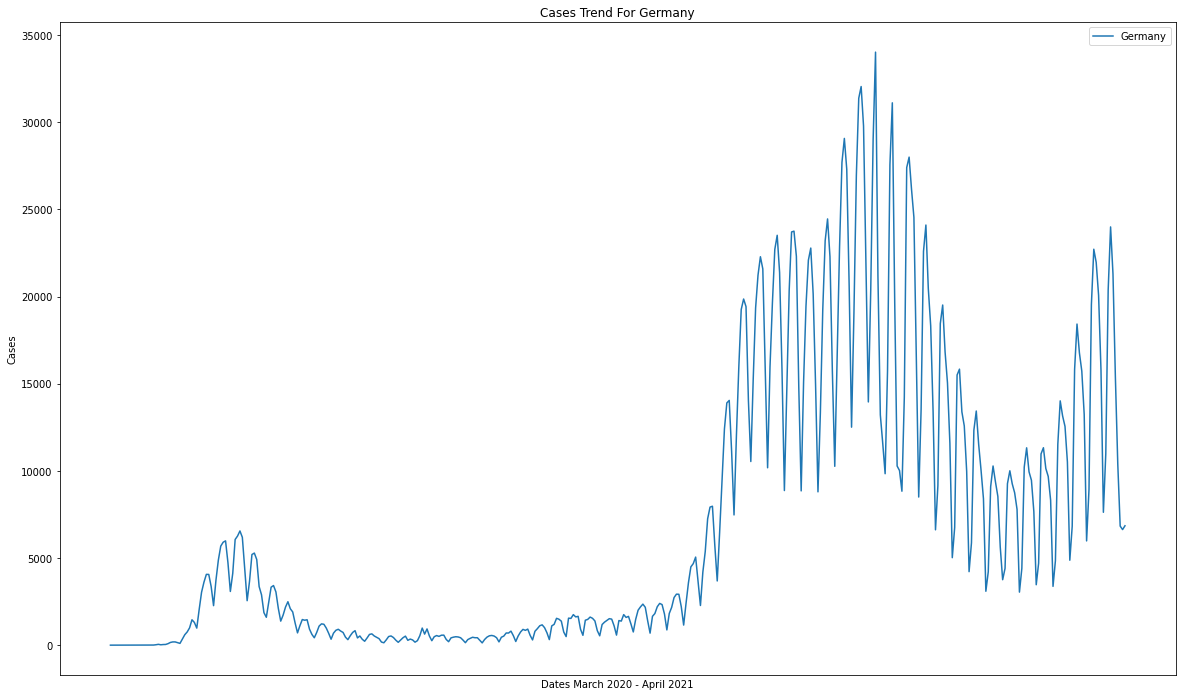

In [ ]:
Germany = covidData.groupby("date", as_index=False)["cases"].sum()  #get sum cases

dates = Germany["date"] #date column
deaths = Germany["cases"] #deaths columns

#plot data
plt.plot(dates,deaths)

#label graph
plt.xticks([], [])
plt.xlabel("Dates March 2020 - April 2021")
plt.ylabel("Cases")
plt.legend(["Germany"])
plt.title("Cases Trend For Germany")



The cases tend to have really peaked around March 2021, and since then it's lowered but still on the rise.

###  How is the death trend different from each state/county(Nikhil)?

Text(0.5, 1.0, 'Death Trend For States In Germany')

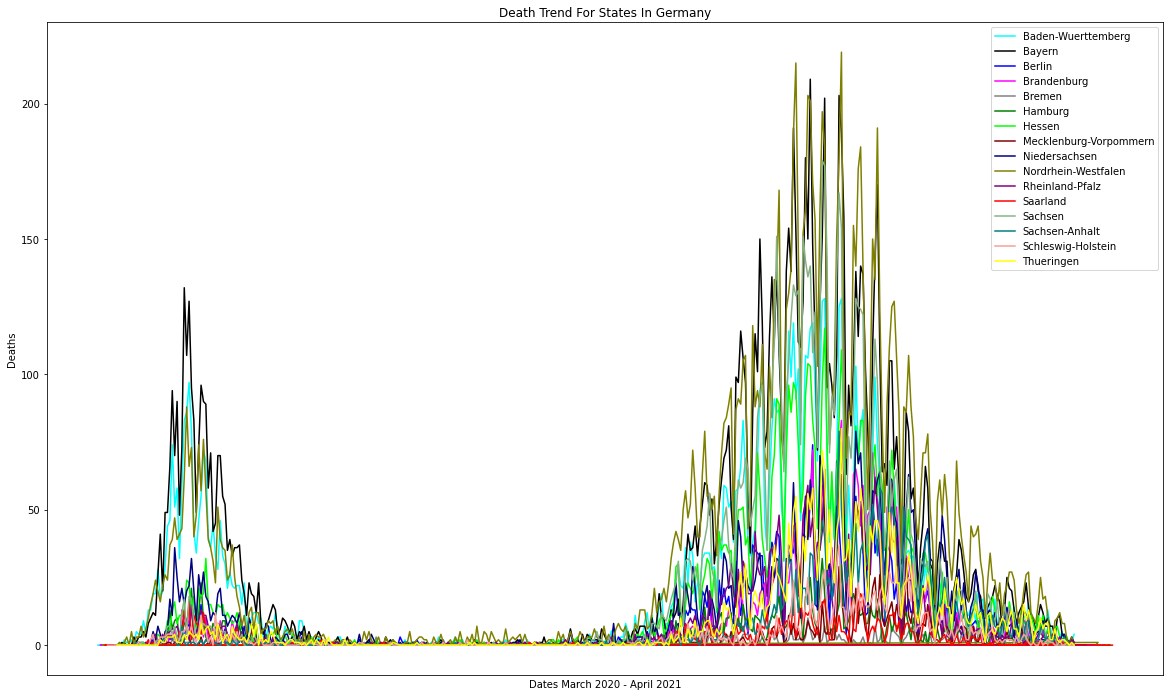

In [ ]:
plt.figure(figsize=(20,12))
#group by state
checkState = covidData.groupby('state')
allStates = list(checkState.groups.keys())

#color List
colorsList = ['#00FFFF', '#000000', '#0000FF', '#FF00FF', '#808080', '#008000', '#00FF00', '#800000', '#000080', '#808000', '#800080', '#FF0000', '#86B283', '#008080', '#F79F99', '#FFFF00']
counter = 0
for state in allStates:
  Baden = covidData[covidData["state"] == state]

  Baden = Baden.groupby("date", as_index=False)["deaths"].sum()

  dates = Baden["date"]
  deaths = Baden["deaths"]

  plt.plot(dates,deaths, color=colorsList[counter])
  counter += 1
 
#plot setup
plt.xticks([], [])
plt.xlabel("Dates March 2020 - April 2021")
plt.ylabel("Deaths")
plt.legend(allStates)
plt.title("Death Trend For States In Germany")



According to the plot, we can see that the cases trend for the specific states. There are two major spikes. Expecially around March 2021 where it peaks. And after those spikes the deaths have decreased. In the plot, Bremen, seems to have to lowest increasing rate, as it tended to be around the same death count throughout. While, Nordrhein, seemed to have the largest spike in deaths, as it starts off very low, and suddenly jumps to becoming the highest death count state.

###  How is the case trend different from each state/county(Nikhil)?

Text(0.5, 1.0, 'Cases Trend For States In Germany')

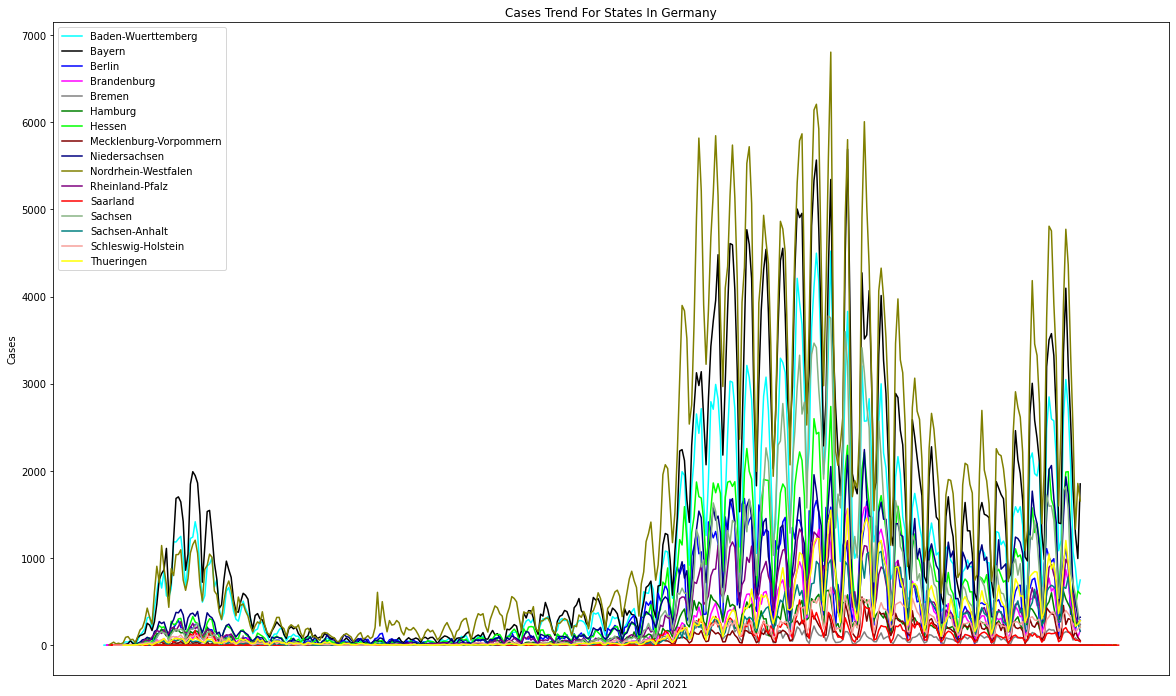

In [ ]:
#plot 
plt.figure(figsize=(20,12))

checkState = covidData.groupby('state')
allStates = list(checkState.groups.keys())

#color List
colorsList = ['#00FFFF', '#000000', '#0000FF', '#FF00FF', '#808080', '#008000', '#00FF00', '#800000', '#000080', '#808000', '#800080', '#FF0000', '#86B283', '#008080', '#F79F99', '#FFFF00']
counter = 0
for state in allStates:
  Baden = covidData[covidData["state"] == state]

  Baden = Baden.groupby("date", as_index=False)["cases"].sum()

  dates = Baden["date"]
  cases = Baden["cases"]

 

  plt.plot(dates,cases,color=colorsList[counter])
  counter += 1
 


#plot setup
plt.xticks([], [])
plt.xlabel("Dates March 2020 - April 2021")
plt.ylabel("Cases")
plt.legend(allStates)
plt.title("Cases Trend For States In Germany")





According to the plot, we can see that the cases trend for the specific states. There are two major spikes. Expecially around March 2021 where it peaks. In the plot, Bremen, seems to have to lowest increasing rate, as it tended to be around the same cases count throughout. While, Nordrhein-Westfalen, seemed to have the largest spike in cases, as it starts off very low, and suddenly jumps to becoming the highest cases count state.

###What is the covid death rate trend in Germany, and how is it different from each county? (Roshan)
We split up the counties based on different thresholds and visualize them

In [ ]:
#In order to visually be able to view the death trend per county we split up the data into different thresholds of average death rate as there were over 400 counties.

import random
#We group the data by county
checkCounty = covidData.groupby('county')
allCounties = list(checkCounty.groups.keys())
#We create random colors for each county
colorsList=[]
for i in range(len(allCounties)):
  colorsList.append("#{:06x}".format(random.randint(0, 0xFFFFFF)))

#Create the lists for each threshold of having average death rate: <= 0.1, <= 0.2, <= 0.3, <= 0.4, <= 0.5, <= 0.6, <= 0.7, <= 0.8, <= 0.9, <= 1, > 1
pointOneCounties = []
pointOneDates = []
pointOneDeaths = []

pointTwoCounties = []
pointTwoDates = []
pointTwoDeaths = []

pointThreeCounties = []
pointThreeDates = []
pointThreeDeaths = []

pointFourCounties = []
pointFourDates = []
pointFourDeaths = []

pointFiveCounties = []
pointFiveDates = []
pointFiveDeaths = []

pointSixCounties = []
pointSixDates = []
pointSixDeaths = []

pointSevenCounties = []
pointSevenDates = []
pointSevenDeaths = []

pointEightCounties = []
pointEightDates = []
pointEightDeaths = []

pointNineCounties = []
pointNineDates = []
pointNineDeaths = []

oneCounties = []
oneDates = []
oneDeaths = []

greaterThanOneCounties=[]
greaterThanOneDates=[]
greaterThanOneDeaths=[]

#We traverse through each county and calculate its average death rate
#We then add the data accordingly to the correct lists

#Here we calculate which counties had the lowest/highest death rate
lowest=['', 0]
highest=['', 0]


counter = 0
i = 0
for county in allCounties:
  Baden = covidData[covidData["county"] == county]
  Baden = Baden.groupby("date", as_index=False)["deaths"].sum()
  
  dates = Baden["date"]
  deaths = Baden["deaths"]
  avg = sum(deaths)/len(deaths)
  
  #Check lowest/highest averages
  if i==0:
    lowest[0] = county
    highest[0] = county
    lowest[1] = avg
    highest[1] = avg
  else:
    if avg < lowest[1]:
      lowest[0]=county
      lowest[1]=avg
    if avg > highest[1]:
      highest[0]=county
      highest[1] = avg


  if avg <= 0.1:
    pointOneCounties.append(county)
    pointOneDates.append(dates)
    pointOneDeaths.append(deaths)
  elif avg <= 0.2:
    pointTwoCounties.append(county)
    pointTwoDates.append(dates)
    pointTwoDeaths.append(deaths)
  elif avg <= 0.3:
    pointThreeCounties.append(county)
    pointThreeDates.append(dates)
    pointThreeDeaths.append(deaths)
  elif avg <= 0.4:
    pointFourCounties.append(county)
    pointFourDates.append(dates)
    pointFourDeaths.append(deaths)
  elif avg <= 0.5:
    pointFiveCounties.append(county)
    pointFiveDates.append(dates)
    pointFiveDeaths.append(deaths)
  elif avg <= 0.6:
    pointSixCounties.append(county)
    pointSixDates.append(dates)
    pointSixDeaths.append(deaths)
  elif avg <= 0.7:
    pointSevenCounties.append(county)
    pointSevenDates.append(dates)
    pointSevenDeaths.append(deaths)
  elif avg <= 0.8:
    pointEightCounties.append(county)
    pointEightDates.append(dates)
    pointEightDeaths.append(deaths)
  elif avg <= 0.9:
    pointNineCounties.append(county)
    pointNineDates.append(dates)
    pointNineDeaths.append(deaths)
  elif avg <= 1:
    oneCounties.append(county)
    oneDates.append(dates)
    oneDeaths.append(deaths)
  else:
    greaterThanOneCounties.append(county)
    greaterThanOneDates.append(dates)
    greaterThanOneDeaths.append(deaths)
  i+=1

Text(0.5, 1.0, 'Death Trend For Counties with Average Death Rate below 0.1 In Germany')

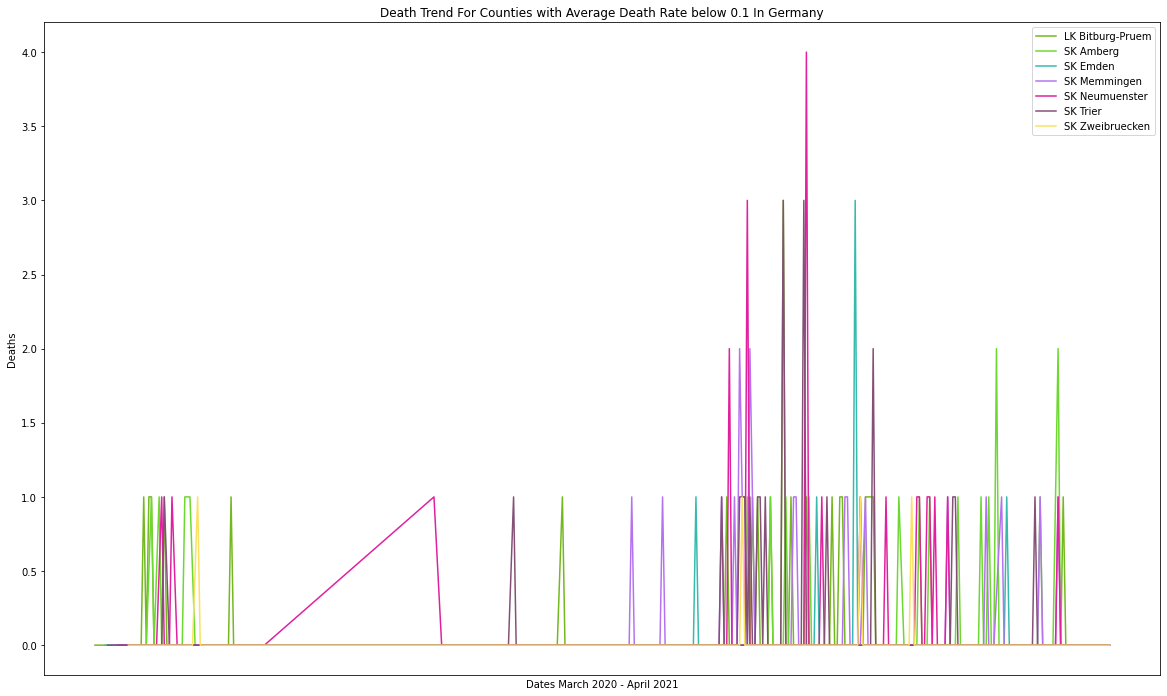

In [ ]:
#Here we plot the data for the counties that had an average death rate below 0.1
import datetime
plt.figure(figsize=(20,12))

for i in range(len(pointOneCounties)):
  
  dates = pointOneDates[i]
  dates = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in dates]
  deaths = pointOneDeaths[i]

  plt.plot(dates,deaths, color=colorsList[counter])
  counter += 1

plt.xticks([], [])
plt.xlabel("Dates March 2020 - April 2021")
plt.ylabel("Deaths")
plt.legend(pointOneCounties)
plt.title("Death Trend For Counties with Average Death Rate below 0.1 In Germany")

Text(0.5, 1.0, 'Death Trend For Counties with Average Death Rate below 0.2 In Germany')

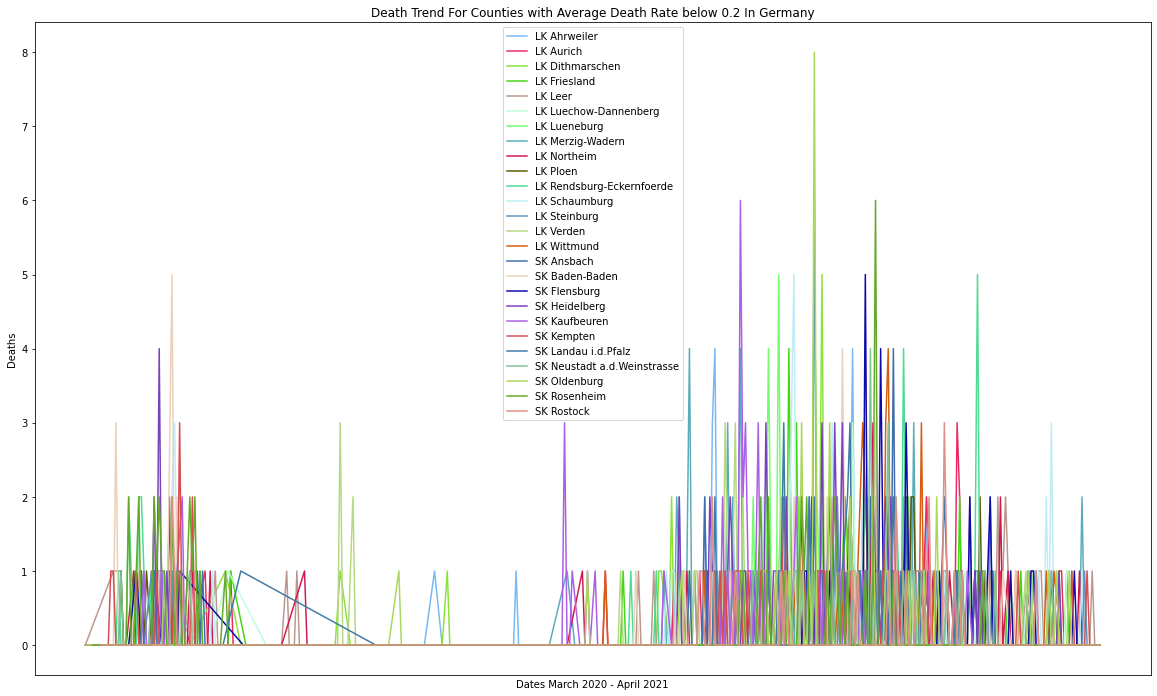

In [ ]:
#Here we plot the data for the counties that had an average death rate below 0.2
plt.figure(figsize=(20,12))

for i in range(len(pointTwoCounties)):
  dates = pointTwoDates[i]
  dates = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in dates]
  deaths = pointTwoDeaths[i]
  plt.plot(dates,deaths, color=colorsList[counter])
  counter += 1

plt.xticks([], [])
plt.xlabel("Dates March 2020 - April 2021")
plt.ylabel("Deaths")
plt.legend(pointTwoCounties)
plt.title("Death Trend For Counties with Average Death Rate below 0.2 In Germany")

Text(0.5, 1.0, 'Death Trend For Counties with Average Death Rate below 0.3 In Germany')

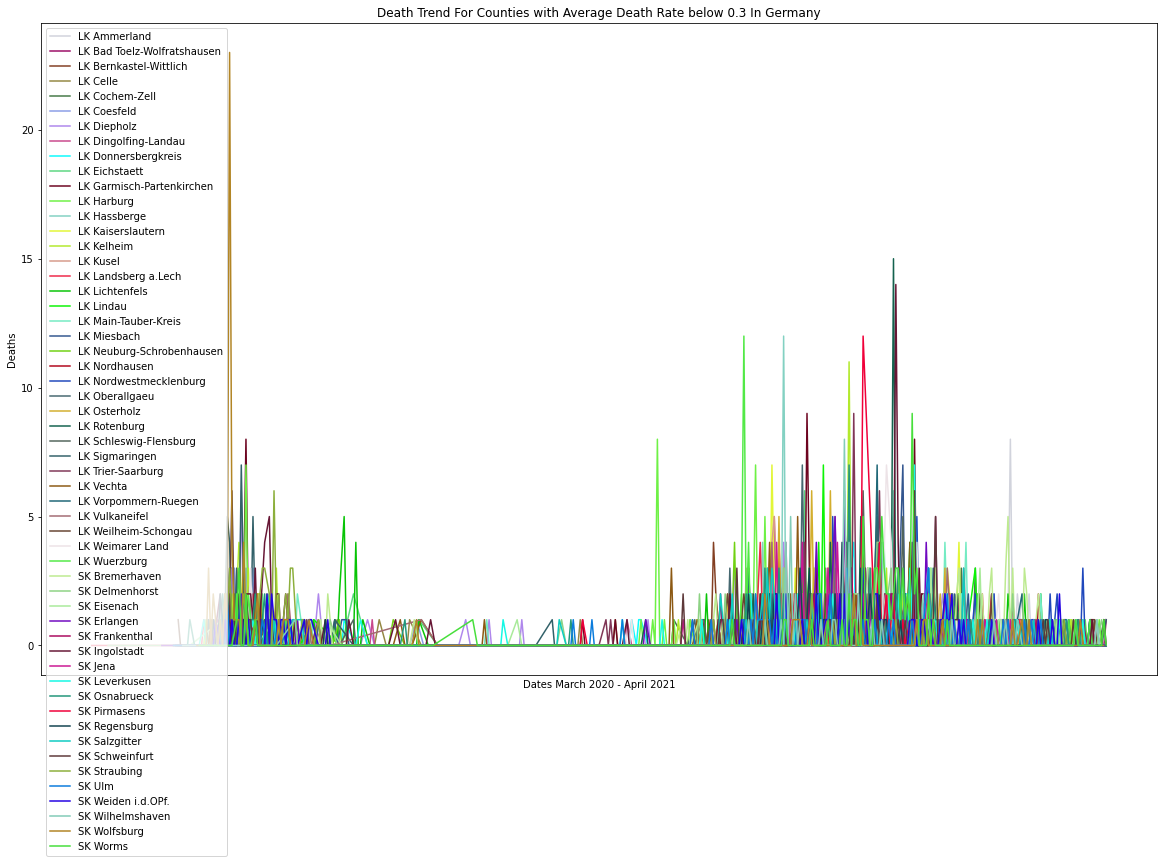

In [ ]:
#Here we plot the data for the counties that had an average death rate below 0.3
plt.figure(figsize=(20,12))

for i in range(len(pointThreeCounties)):
  dates = pointThreeDates[i]
  dates = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in dates]
  deaths = pointThreeDeaths[i]
  plt.plot(dates,deaths, color=colorsList[counter])
  counter += 1

plt.xticks([], [])
plt.xlabel("Dates March 2020 - April 2021")
plt.ylabel("Deaths")
plt.legend(pointThreeCounties)
plt.title("Death Trend For Counties with Average Death Rate below 0.3 In Germany")

Text(0.5, 1.0, 'Death Trend For Counties with Average Death Rate below 0.4 In Germany')

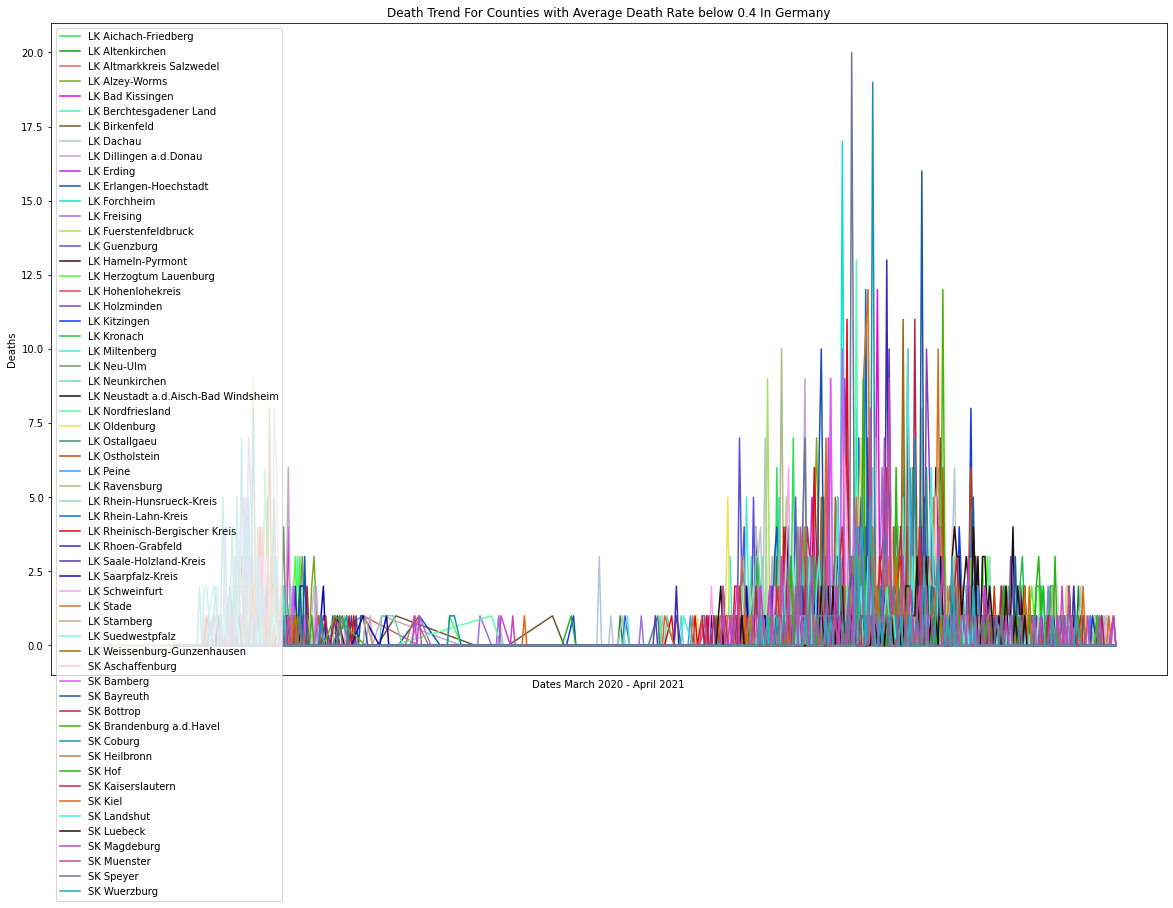

In [ ]:
#Here we plot the data for the counties that had an average death rate below 0.4
plt.figure(figsize=(20,12))

for i in range(len(pointFourCounties)):
  dates = pointFourDates[i]
  dates = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in dates]
  deaths = pointFourDeaths[i]
  plt.plot(dates,deaths, color=colorsList[counter])
  counter += 1

plt.xticks([], [])
plt.xlabel("Dates March 2020 - April 2021")
plt.ylabel("Deaths")
plt.legend(pointFourCounties)
plt.title("Death Trend For Counties with Average Death Rate below 0.4 In Germany")

Text(0.5, 1.0, 'Death Trend For Counties with Average Death Rate below 0.5 In Germany')

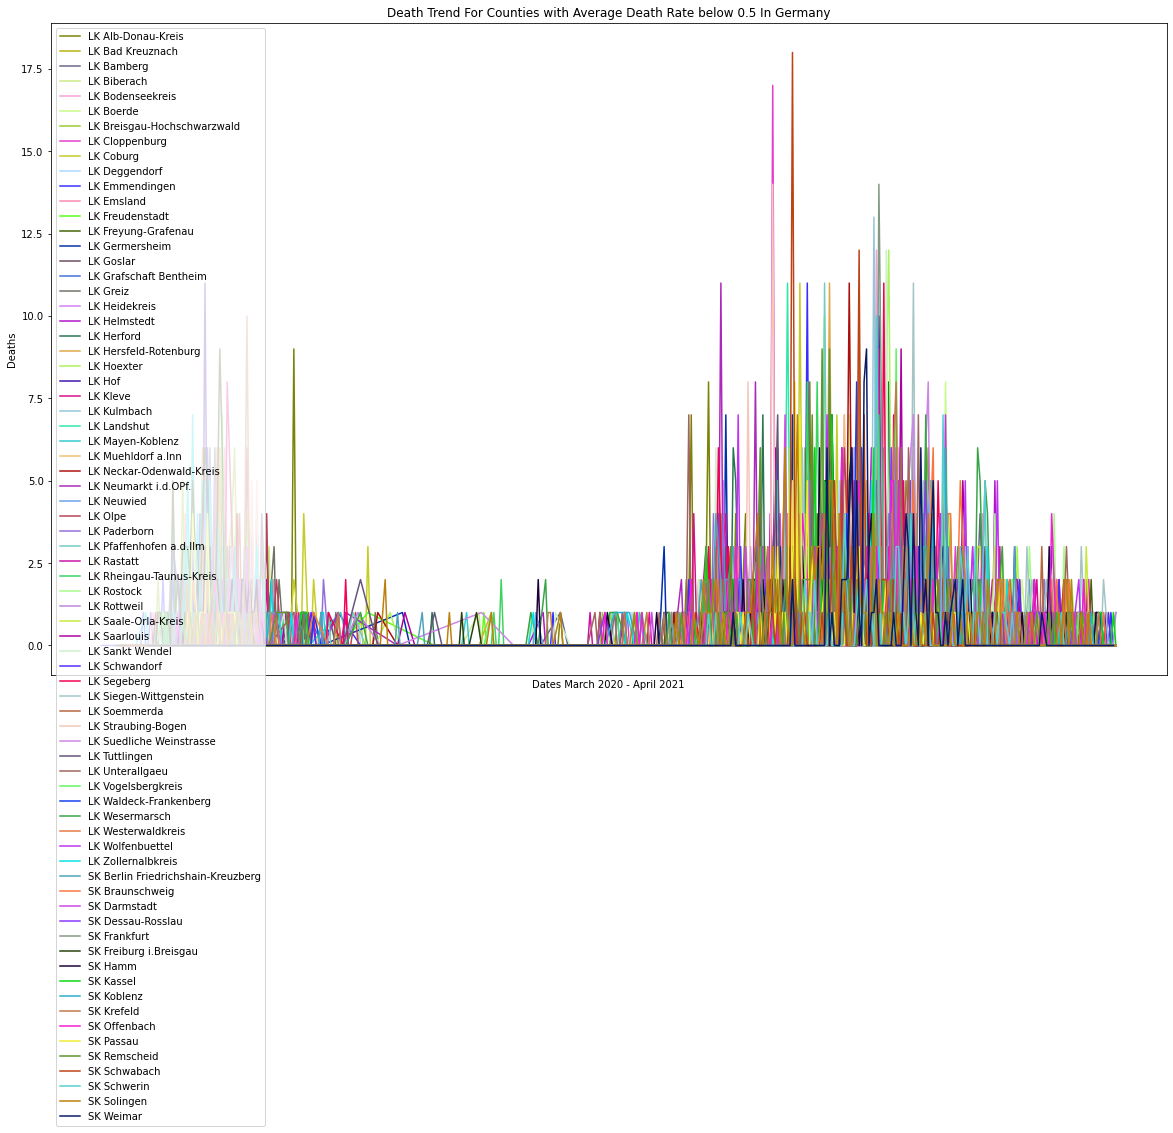

In [ ]:
#Here we plot the data for the counties that had an average death rate below 0.5
plt.figure(figsize=(20,12))

for i in range(len(pointFiveCounties)):
  dates = pointFiveDates[i]
  dates = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in dates]
  deaths = pointFiveDeaths[i]
  plt.plot(dates,deaths, color=colorsList[counter])
  counter += 1

plt.xticks([], [])
plt.xlabel("Dates March 2020 - April 2021")
plt.ylabel("Deaths")
plt.legend(pointFiveCounties)
plt.title("Death Trend For Counties with Average Death Rate below 0.5 In Germany")

Text(0.5, 1.0, 'Death Trend For Counties with Average Death Rate below 0.6 In Germany')

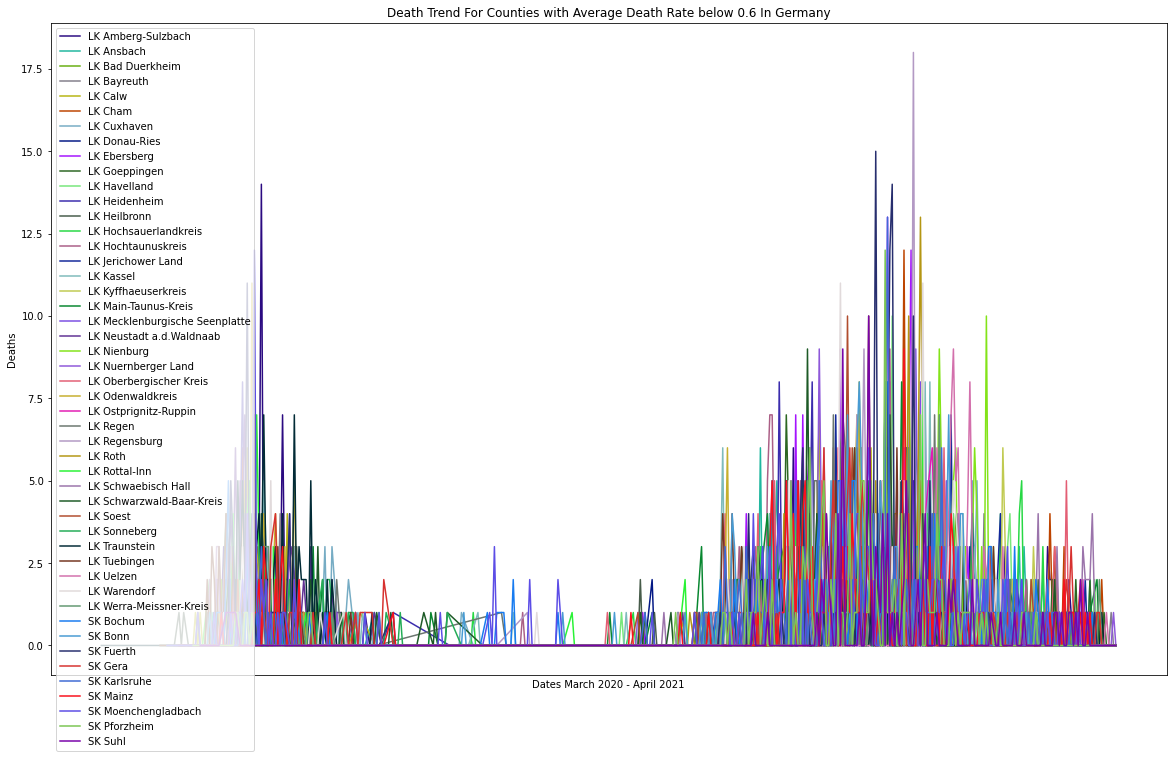

In [ ]:
#Here we plot the data for the counties that had an average death rate below 0.6
plt.figure(figsize=(20,12))

for i in range(len(pointSixCounties)):
  dates = pointSixDates[i]
  dates = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in dates]
  deaths = pointSixDeaths[i]
  plt.plot(dates,deaths, color=colorsList[counter])
  counter += 1

plt.xticks([], [])
plt.xlabel("Dates March 2020 - April 2021")
plt.ylabel("Deaths")
plt.legend(pointSixCounties)
plt.title("Death Trend For Counties with Average Death Rate below 0.6 In Germany")

Text(0.5, 1.0, 'Death Trend For Counties with Average Death Rate below 0.7 In Germany')

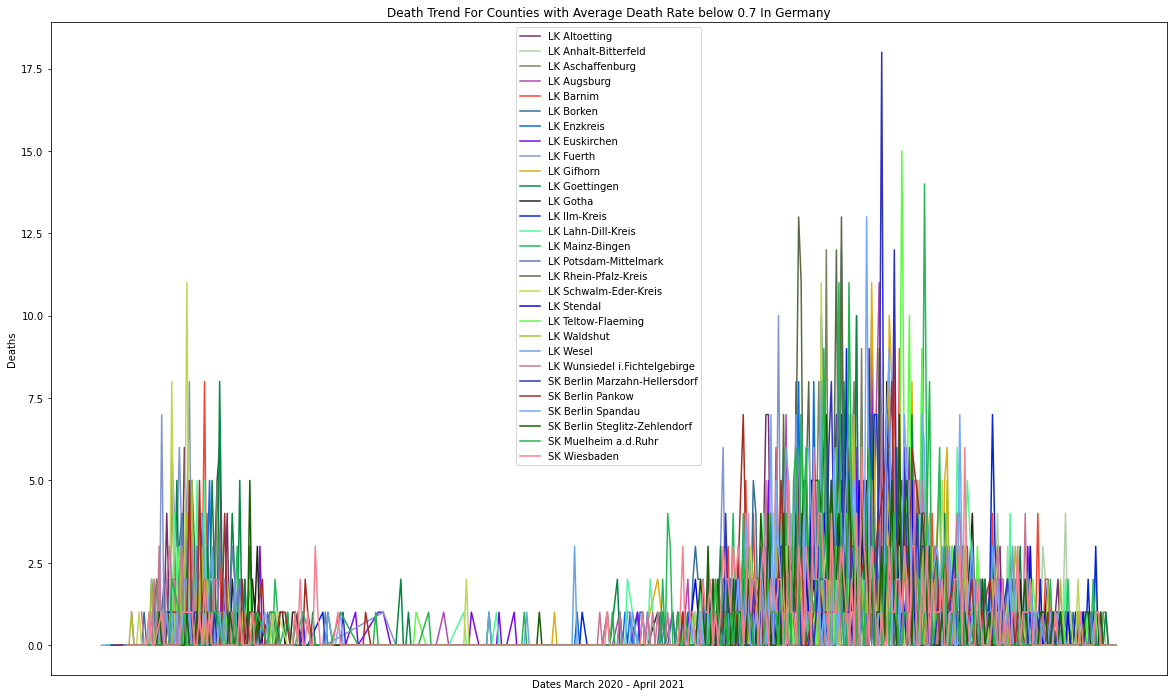

In [ ]:
#Here we plot the data for the counties that had an average death rate below 0.7
plt.figure(figsize=(20,12))

for i in range(len(pointSevenCounties)):
  dates = pointSevenDates[i]
  dates = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in dates]
  deaths = pointSevenDeaths[i]
  plt.plot(dates,deaths, color=colorsList[counter])
  counter += 1

plt.xticks([], [])
plt.xlabel("Dates March 2020 - April 2021")
plt.ylabel("Deaths")
plt.legend(pointSevenCounties)
plt.title("Death Trend For Counties with Average Death Rate below 0.7 In Germany")

Text(0.5, 1.0, 'Death Trend For Counties with Average Death Rate below 0.8 In Germany')

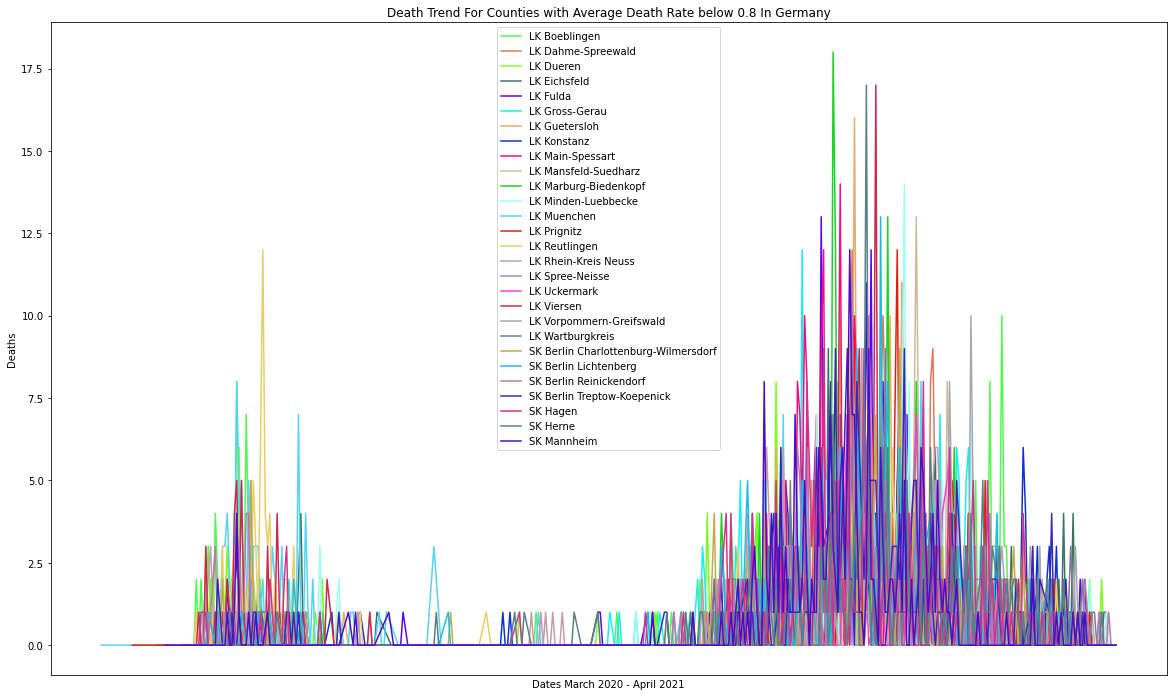

In [ ]:
#Here we plot the data for the counties that had an average death rate below 0.8
plt.figure(figsize=(20,12))

for i in range(len(pointEightCounties)):
  dates = pointEightDates[i]
  dates = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in dates]
  deaths = pointEightDeaths[i]
  plt.plot(dates,deaths, color=colorsList[counter])
  counter += 1

plt.xticks([], [])
plt.xlabel("Dates March 2020 - April 2021")
plt.ylabel("Deaths")
plt.legend(pointEightCounties)
plt.title("Death Trend For Counties with Average Death Rate below 0.8 In Germany")

Text(0.5, 1.0, 'Death Trend For Counties with Average Death Rate below 0.9 In Germany')

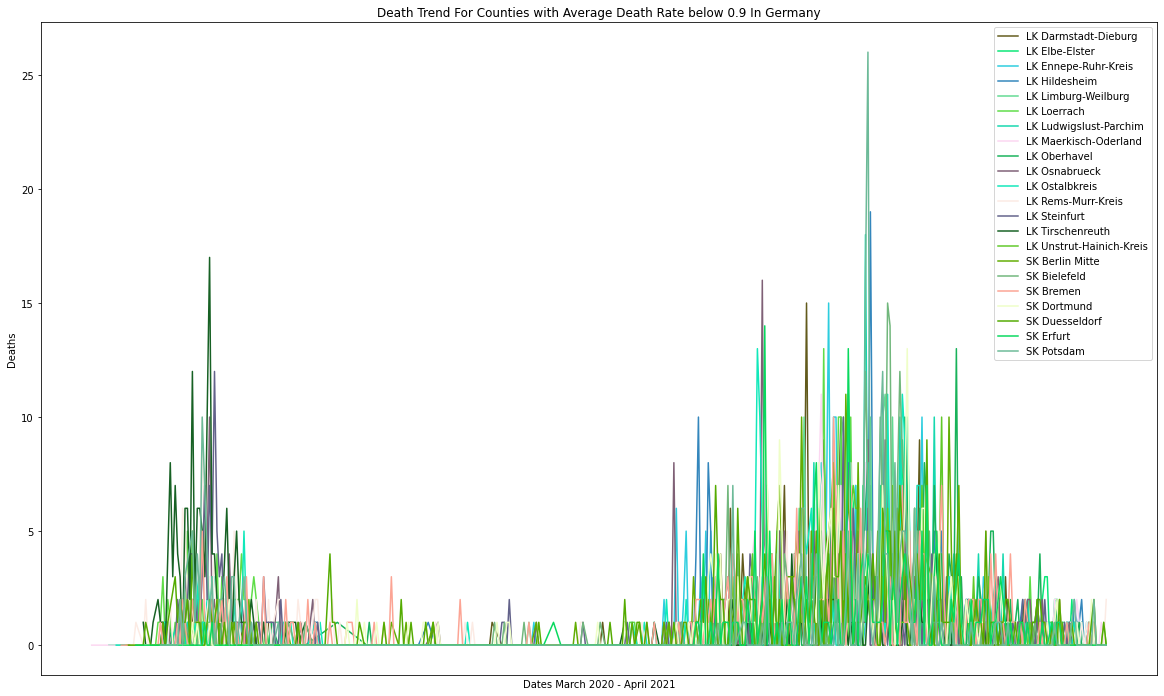

In [ ]:
#Here we plot the data for the counties that had an average death rate below 0.9
plt.figure(figsize=(20,12))

for i in range(len(pointNineCounties)):
  dates = pointNineDates[i]
  dates = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in dates]
  deaths = pointNineDeaths[i]
  plt.plot(dates,deaths, color=colorsList[counter])
  counter += 1

plt.xticks([], [])
plt.xlabel("Dates March 2020 - April 2021")
plt.ylabel("Deaths")
plt.legend(pointNineCounties)
plt.title("Death Trend For Counties with Average Death Rate below 0.9 In Germany")

Text(0.5, 1.0, 'Death Trend For Counties with Average Death Rate below 1 In Germany')

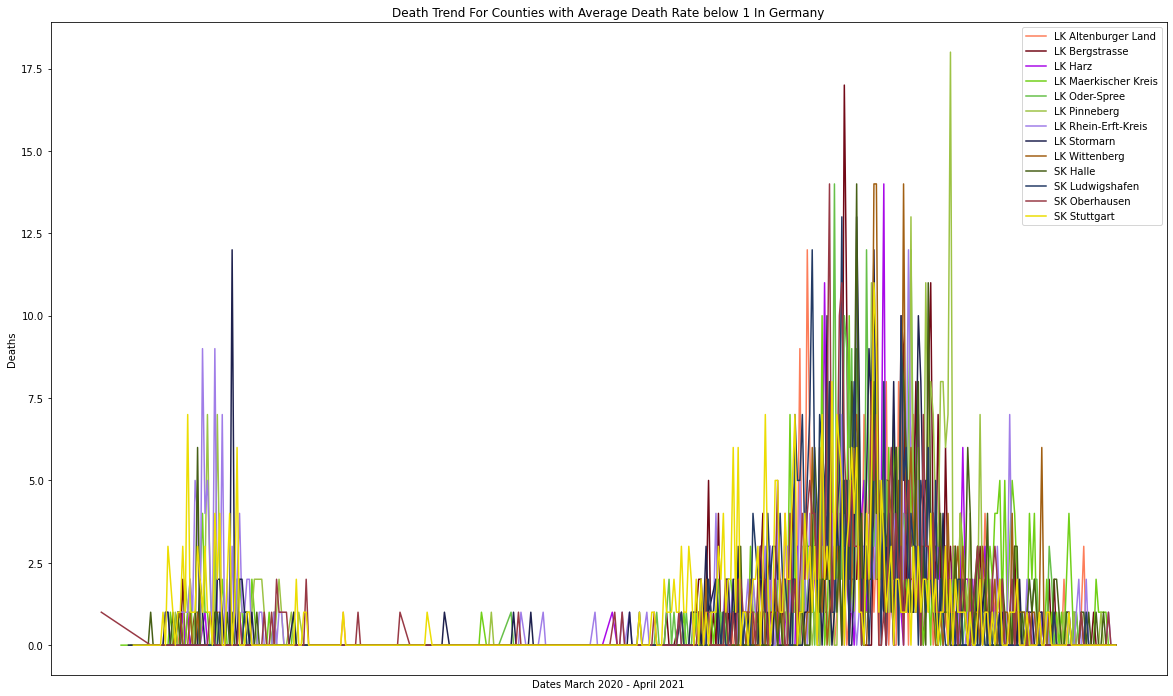

In [ ]:
#Here we plot the data for the counties that had an average death rate below 1
plt.figure(figsize=(20,12))

for i in range(len(oneCounties)):
  dates = oneDates[i]
  dates = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in dates]
  deaths = oneDeaths[i]
  plt.plot(dates,deaths, color=colorsList[counter])
  counter += 1

plt.xticks([], [])
plt.xlabel("Dates March 2020 - April 2021")
plt.ylabel("Deaths")
plt.legend(oneCounties)
plt.title("Death Trend For Counties with Average Death Rate below 1 In Germany")

Text(0.5, 1.0, 'Death Trend For Counties with Average Death Rate above 1 In Germany')

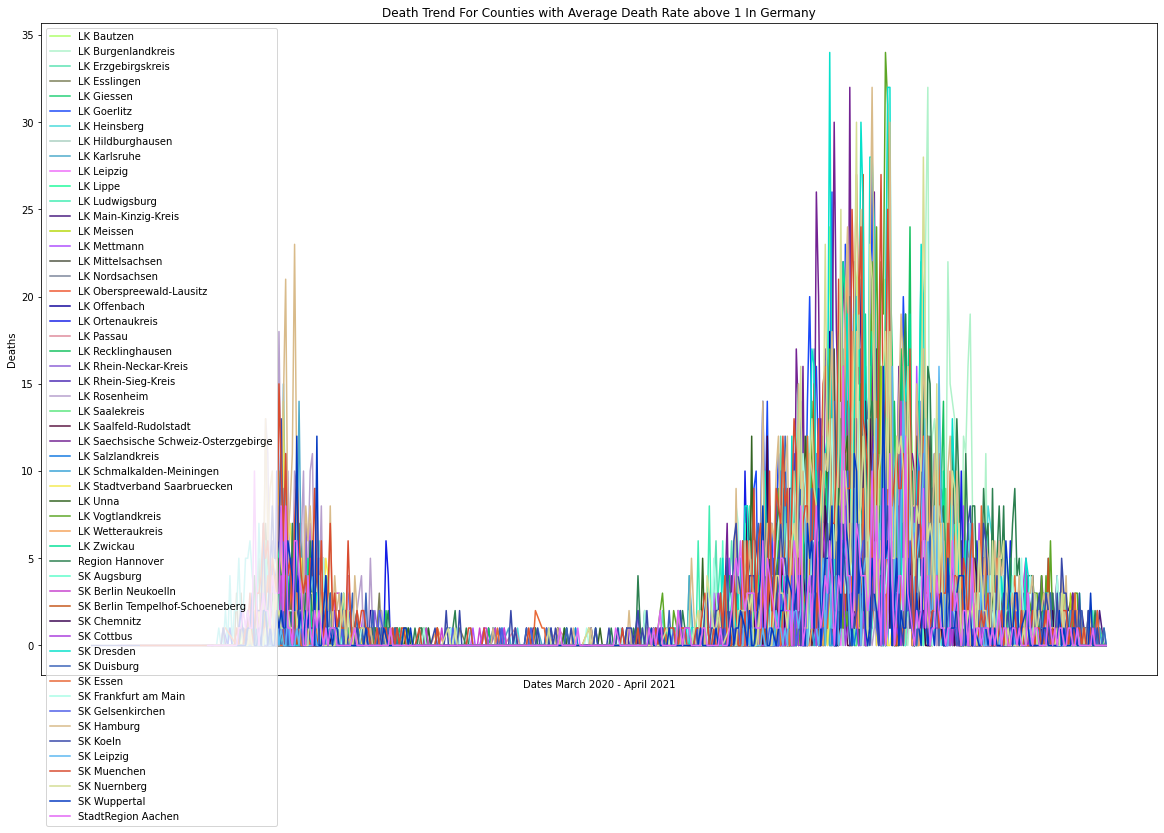

In [ ]:
#Here we plot the data for the counties that had an average death rate above 1
plt.figure(figsize=(20,12))

for i in range(len(greaterThanOneCounties)):
  dates = greaterThanOneDates[i]
  dates = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in dates]
  deaths = greaterThanOneDeaths[i]
  plt.plot(dates,deaths, color=colorsList[counter])
  counter += 1

plt.xticks([], [])
plt.xlabel("Dates March 2020 - April 2021")
plt.ylabel("Deaths")
plt.legend(greaterThanOneCounties)
plt.title("Death Trend For Counties with Average Death Rate above 1 In Germany")

In [ ]:
#Here we analyze which county had the highest/lowest average death rate
print('The county with the lowest death rate was: ', lowest[0], ' with an average death rate of: ', lowest[1], ' people')
print('The county with the highest death rate was: ', highest[0], ' with an average death rate of: ', highest[1], ' people')

The county with the lowest death rate was:  SK Zweibruecken  with an average death rate of:  0.023255813953488372  people
The county with the highest death rate was:  LK Goerlitz  with an average death rate of:  3.7333333333333334  people


###What is the covid case trend in Germany, and how is it different from each county? (Roshan)
We split up the counties based on different thresholds and visualize them

In [ ]:
#In order to visually be able to view the case trend per county we split up the data into different thresholds of average case rate as there were over 400 counties.

import random
#We group the data by county
checkCounty = covidData.groupby('county')
allCounties = list(checkCounty.groups.keys())
#We create random colors for each county
colorsList=[]
for i in range(len(allCounties)):
  colorsList.append("#{:06x}".format(random.randint(0, 0xFFFFFF)))
#Create the lists for each threshold of having average case rate: <= 10, <= 20, <= 30, <= 40, > 40
tenCounties = []
tenDates = []
tenCases = []

twentyCounties = []
twentyDates = []
twentyCases = []

thirtyCounties = []
thirtyDates = []
thirtyCases = []

fourtyCounties = []
fourtyDates = []
fourtyCases = []

greaterThanFourtyCounties = []
greaterThanFourtyDates = []
greaterThanFourtyCases = []
#We traverse through each county and calculate its average case rate
#We then add the data accordingly to the correct lists based on the threshold


#Here we calculate which counties had the lowest/highest case rate
lowest=['', 0]
highest=['', 0]

counter = 0
i=0
for county in allCounties:
  Baden = covidData[covidData["county"] == county]
  Baden = Baden.groupby("date", as_index=False)["cases"].sum()
  
  dates = Baden["date"]
  cases = Baden["cases"]
  avg = sum(cases)/len(cases)

  #Check lowest/highest averages
  if i==0:
    lowest[0] = county
    highest[0] = county
    lowest[1] = avg
    highest[1] = avg
  else:
    if avg < lowest[1]:
      lowest[0]=county
      lowest[1]=avg
    if avg > highest[1]:
      highest[0]=county
      highest[1] = avg

  if avg <= 10:
    tenCounties.append(county)
    tenDates.append(dates)
    tenCases.append(cases)
  elif avg <= 20:
    twentyCounties.append(county)
    twentyDates.append(dates)
    twentyCases.append(cases)
  elif avg <= 30:
    thirtyCounties.append(county)
    thirtyDates.append(dates)
    thirtyCases.append(cases)
  elif avg <= 40:
    fourtyCounties.append(county)
    fourtyDates.append(dates)
    fourtyCases.append(cases)
  else:
    greaterThanFourtyCounties.append(county)
    greaterThanFourtyDates.append(dates)
    greaterThanFourtyCases.append(cases)
  i+=1

Text(0.5, 1.0, 'Case Trend For Counties with Average Case Rate below 10 In Germany')

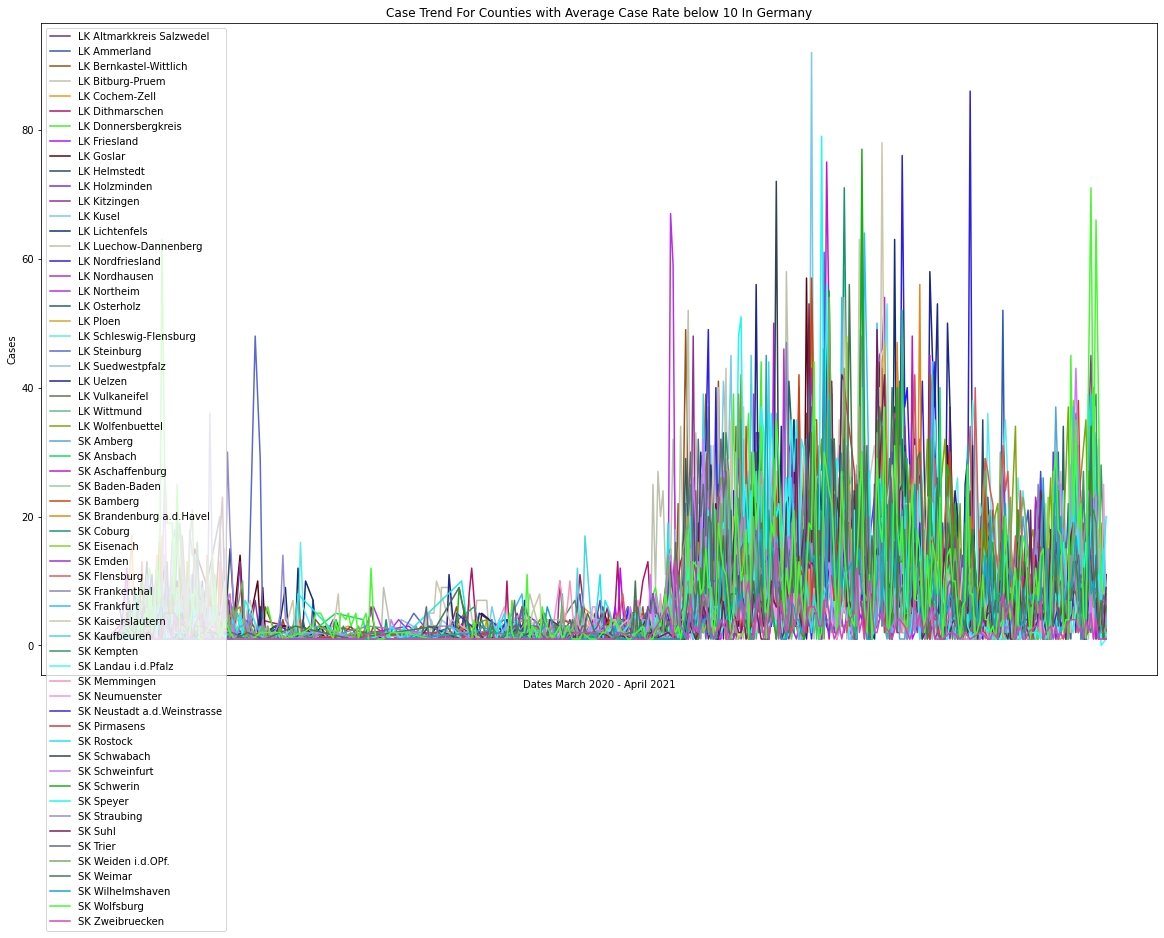

In [ ]:
#Here we plot the data for the counties that had an average case rate below 10
plt.figure(figsize=(20,12))

for i in range(len(tenCounties)):
  dates = tenDates[i]
  dates = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in dates]
  cases = tenCases[i]
  plt.plot(dates,cases, color=colorsList[counter])
  counter += 1

plt.xticks([], [])
plt.xlabel("Dates March 2020 - April 2021")
plt.ylabel("Cases")
plt.legend(tenCounties)
plt.title("Case Trend For Counties with Average Case Rate below 10 In Germany")

Text(0.5, 1.0, 'Case Trend For Counties with Average Case Rate below 20 In Germany')

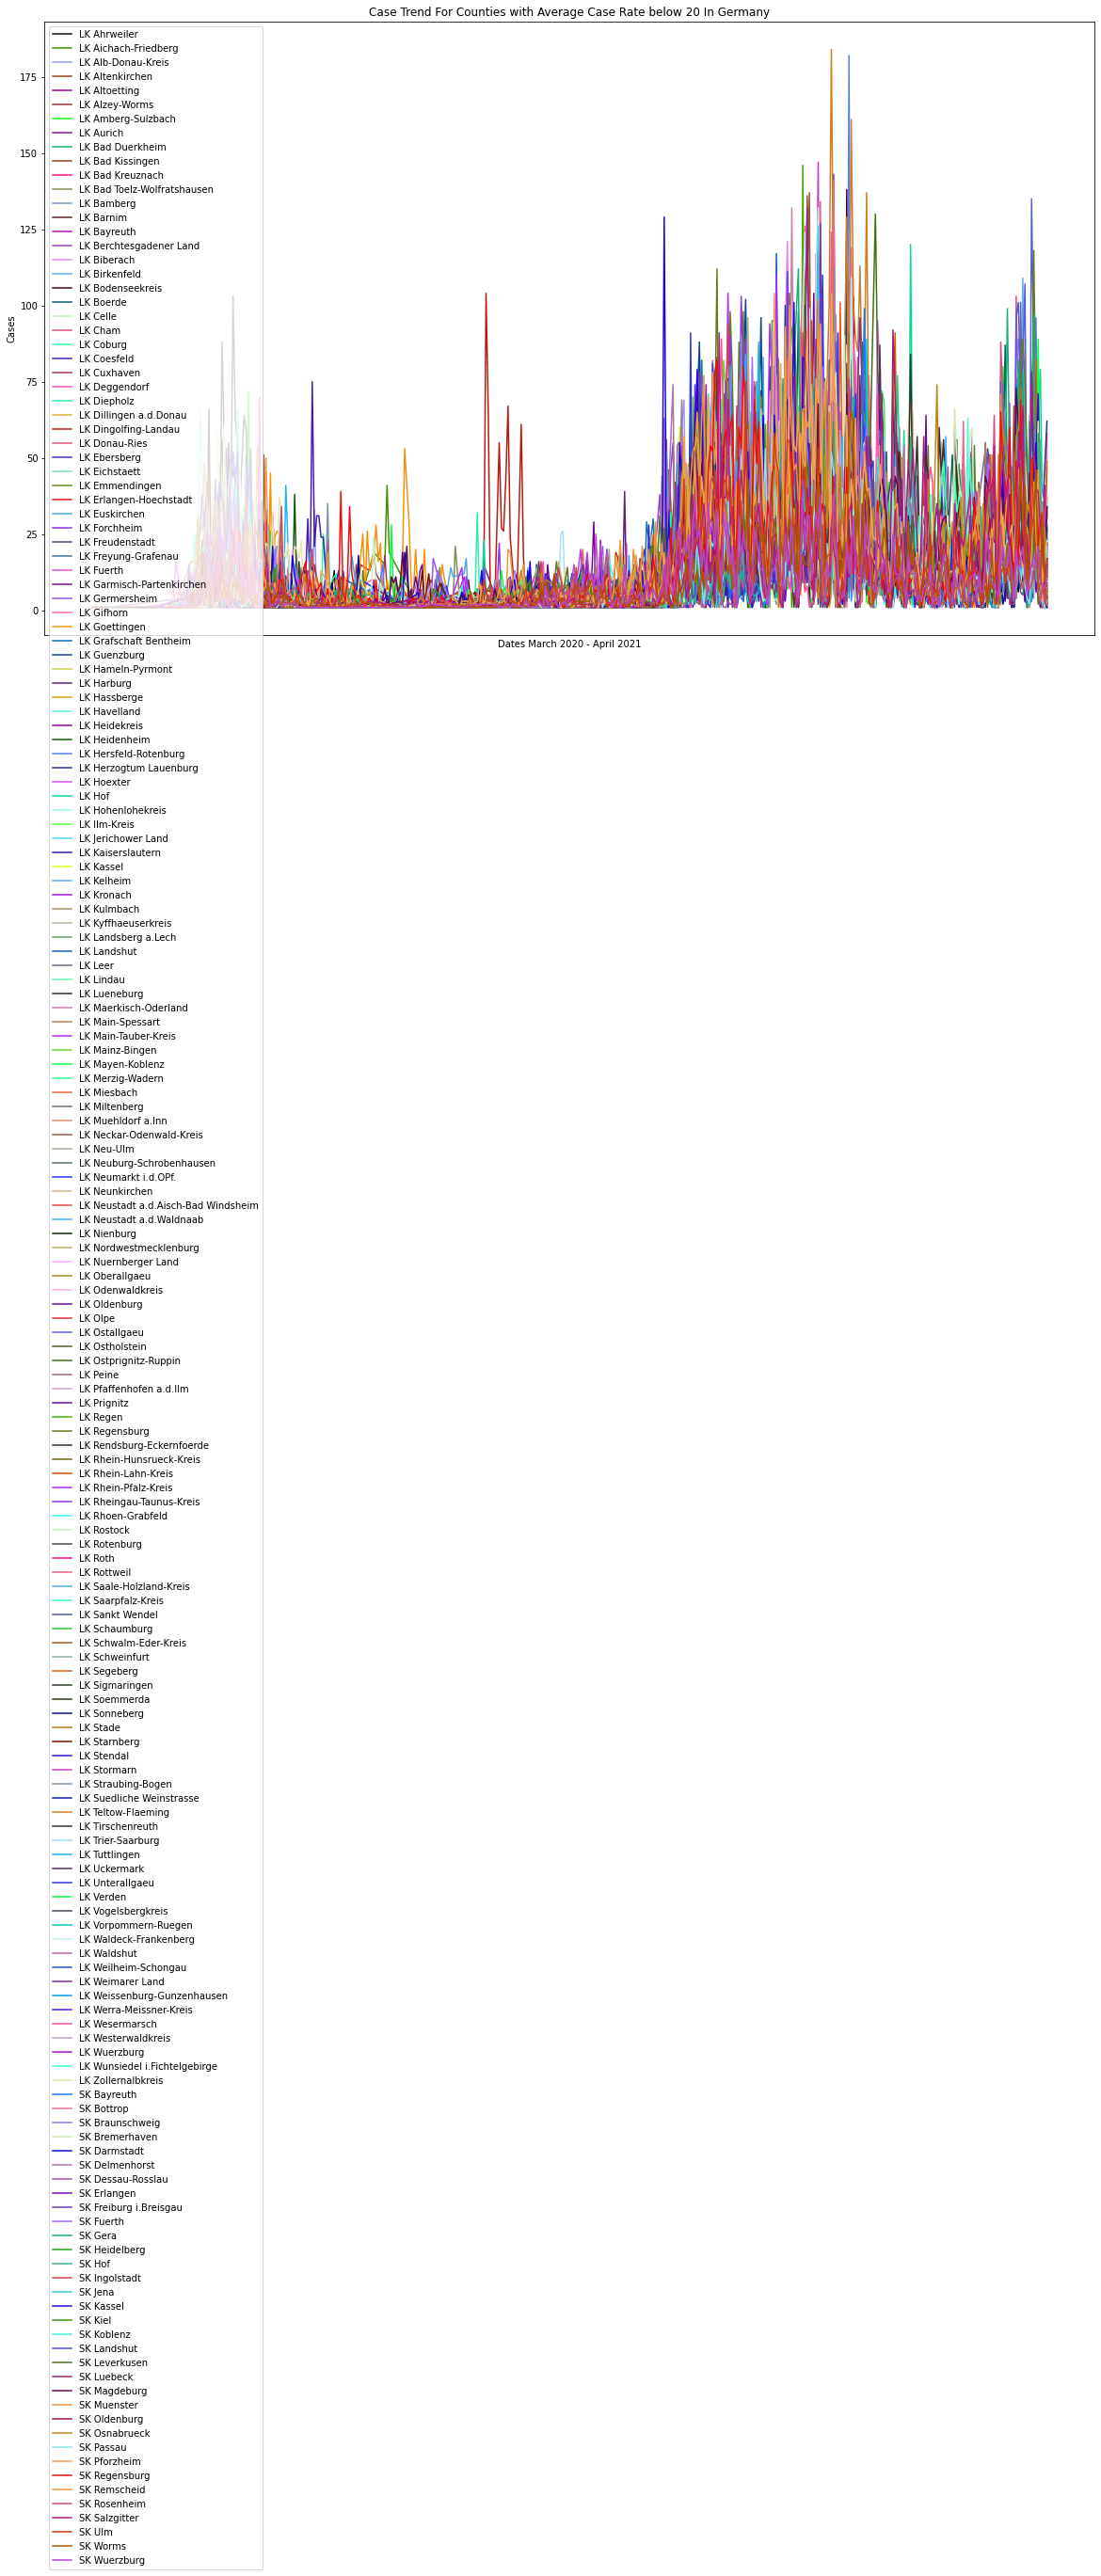

In [ ]:
#Here we plot the data for the counties that had an average case rate below 20
plt.figure(figsize=(20,12))

for i in range(len(twentyCounties)):
  dates = twentyDates[i]
  dates = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in dates]
  cases = twentyCases[i]
  plt.plot(dates,cases, color=colorsList[counter])
  counter += 1

plt.xticks([], [])
plt.xlabel("Dates March 2020 - April 2021")
plt.ylabel("Cases")
plt.legend(twentyCounties)
plt.title("Case Trend For Counties with Average Case Rate below 20 In Germany")

Text(0.5, 1.0, 'Case Trend For Counties with Average Case Rate below 30 In Germany')

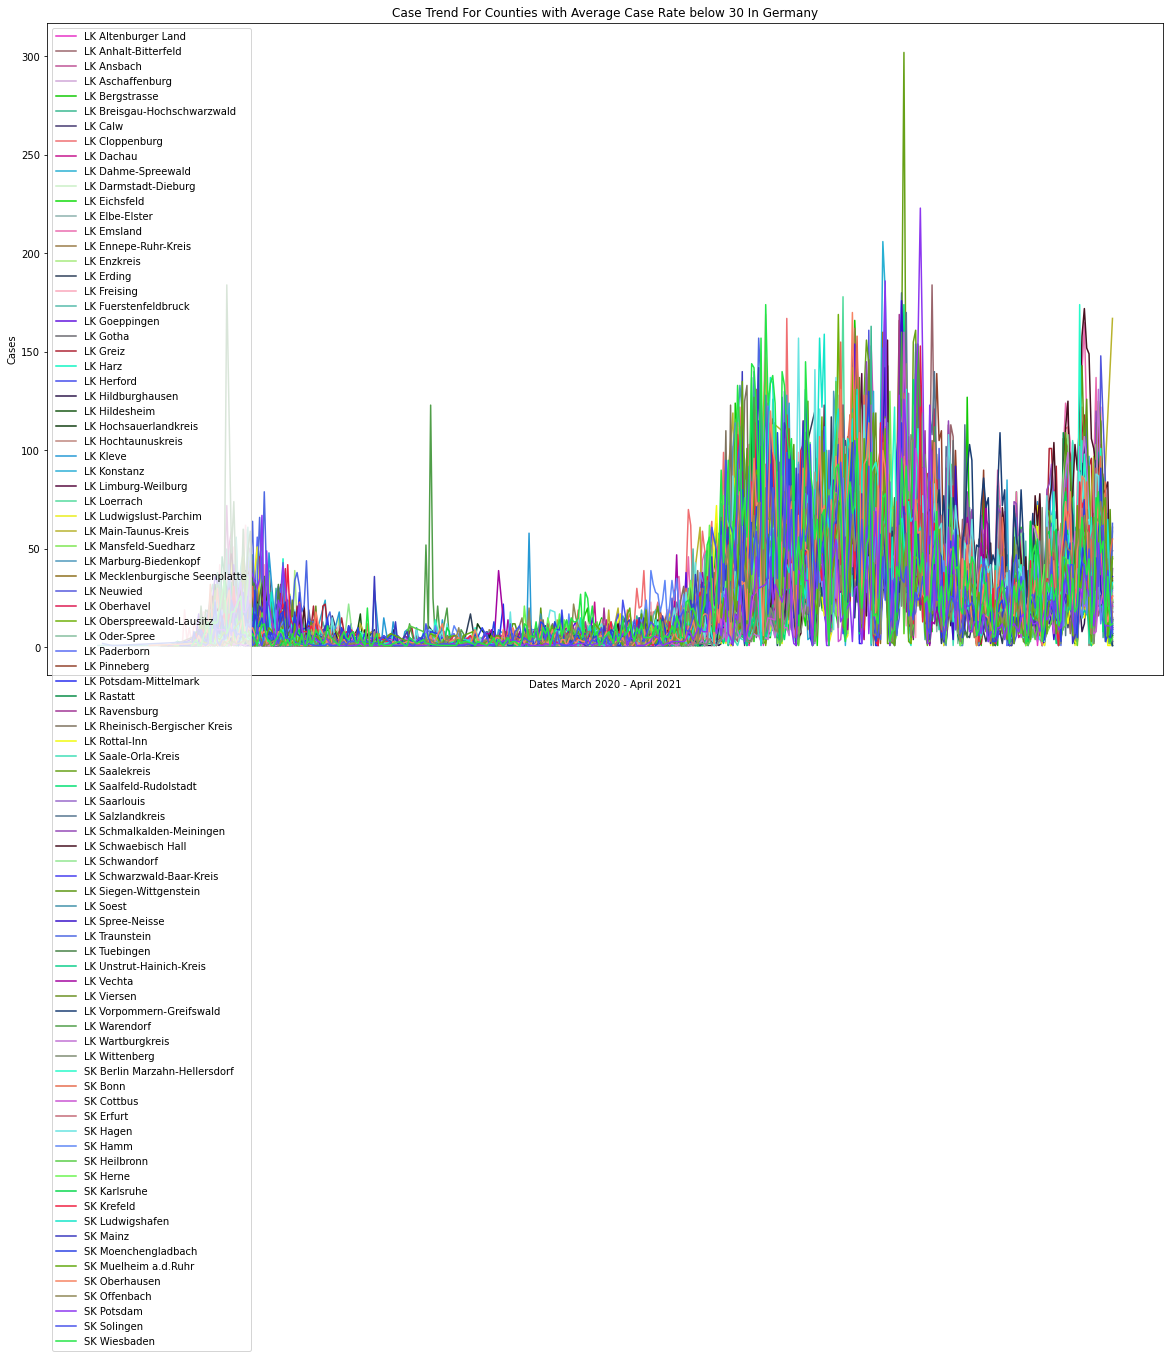

In [ ]:
#Here we plot the data for the counties that had an average case rate below 30
plt.figure(figsize=(20,12))

for i in range(len(thirtyCounties)):
  dates = thirtyDates[i]
  dates = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in dates]
  cases = thirtyCases[i]
  plt.plot(dates,cases, color=colorsList[counter])
  counter += 1

plt.xticks([], [])
plt.xlabel("Dates March 2020 - April 2021")
plt.ylabel("Cases")
plt.legend(thirtyCounties)
plt.title("Case Trend For Counties with Average Case Rate below 30 In Germany")

Text(0.5, 1.0, 'Case Trend For Counties with Average Case Rate below 40 In Germany')

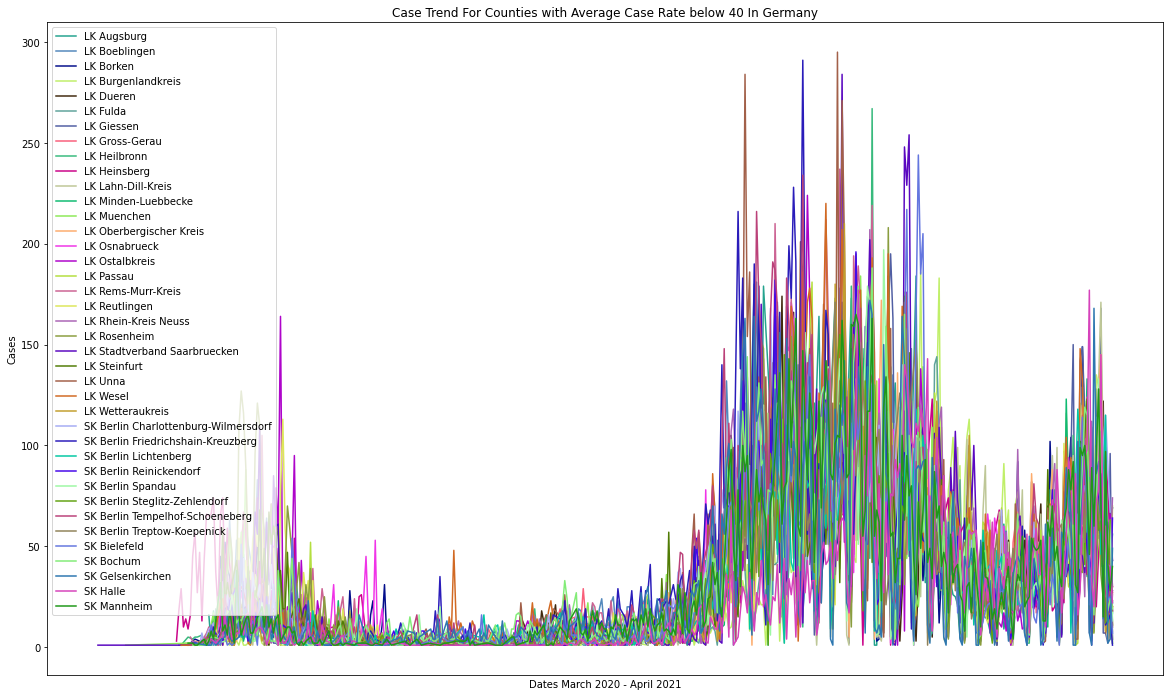

In [ ]:
#Here we plot the data for the counties that had an average case rate below 40
plt.figure(figsize=(20,12))

for i in range(len(fourtyCounties)):
  dates = fourtyDates[i]
  dates = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in dates]
  cases = fourtyCases[i]
  plt.plot(dates,cases, color=colorsList[counter])
  counter += 1

plt.xticks([], [])
plt.xlabel("Dates March 2020 - April 2021")
plt.ylabel("Cases")
plt.legend(fourtyCounties)
plt.title("Case Trend For Counties with Average Case Rate below 40 In Germany")

Text(0.5, 1.0, 'Case Trend For Counties with Average Case Rate greater than 40 In Germany')

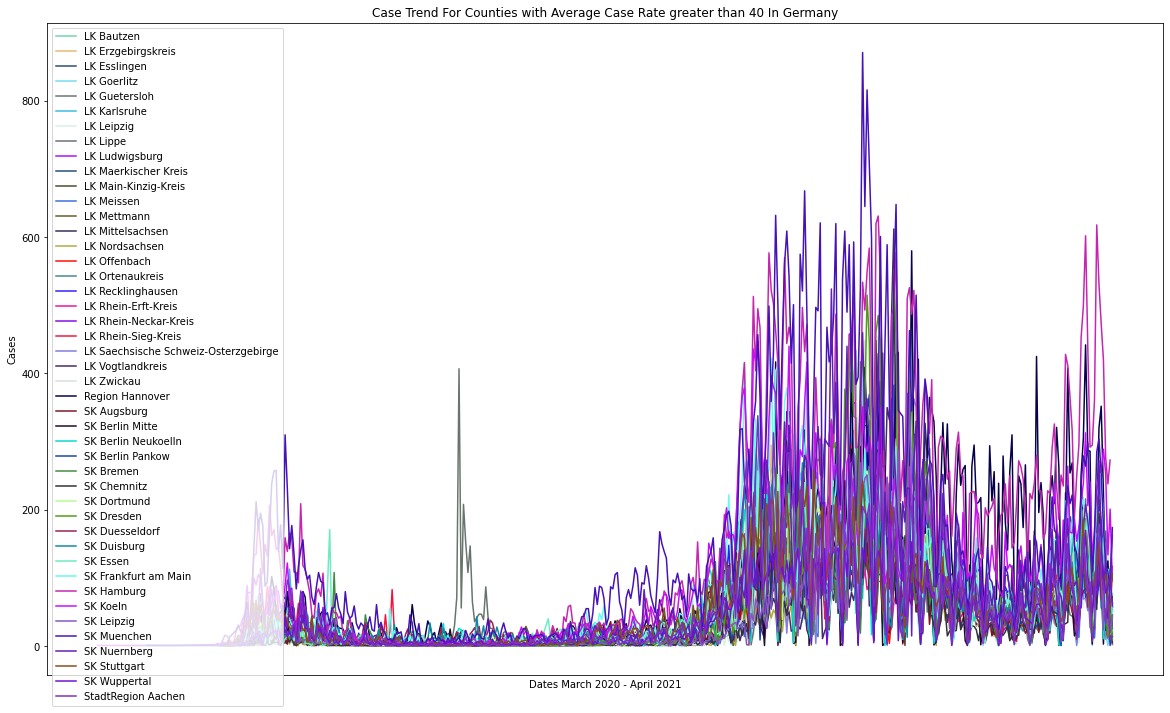

In [ ]:
#Here we plot the data for the counties that had an average case rate above 40
plt.figure(figsize=(20,12))

for i in range(len(greaterThanFourtyCounties)):
  dates = greaterThanFourtyDates[i]
  dates = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in dates]
  cases = greaterThanFourtyCases[i]
  plt.plot(dates,cases, color=colorsList[counter])
  counter += 1

plt.xticks([], [])
plt.xlabel("Dates March 2020 - April 2021")
plt.ylabel("Cases")
plt.legend(greaterThanFourtyCounties)
plt.title("Case Trend For Counties with Average Case Rate greater than 40 In Germany")

In [ ]:
#Here we analyze which county had the highest/lowest average case rate
print('The county with the lowest case rate was: ', lowest[0], ' with an average case rate of: ', lowest[1], ' people')
print('The county with the highest case rate was: ', highest[0], ' with an average case rate of: ', highest[1], ' people')

The county with the lowest case rate was:  SK Zweibruecken  with an average case rate of:  3.1744186046511627  people
The county with the highest case rate was:  SK Hamburg  with an average case rate of:  159.9697732997481  people


According to these graphs we can see two major spikes in cases from COVID-19, once in the Spring of 2020 and once during late 2020.

###What contributes to the spreading of the covid cases in Germany? (Roshan)

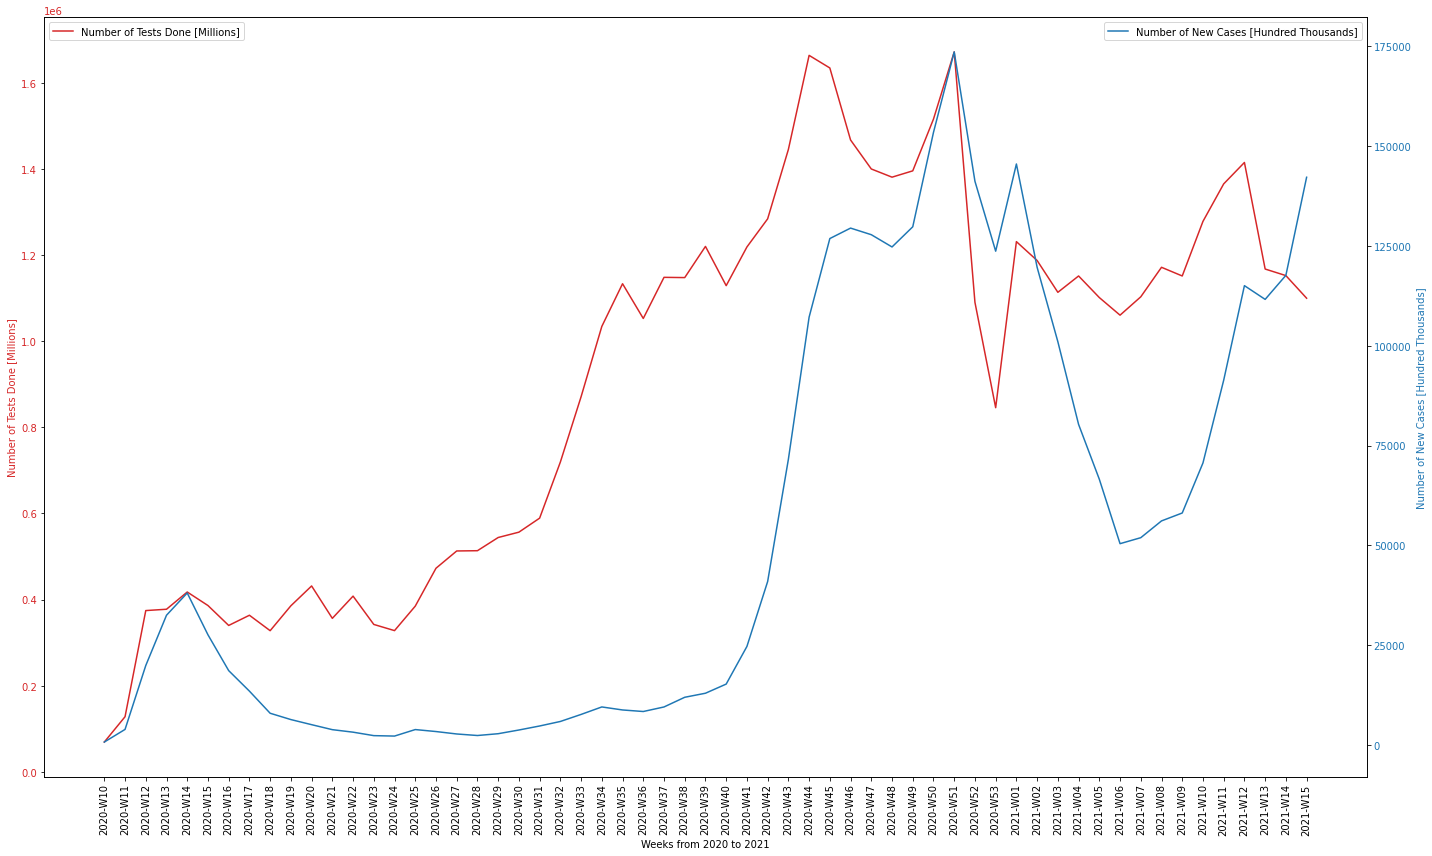

In [ ]:
#When looking into what contributed to the spreading of COVID in Germany we wanted to analyze how the increase in testing is correlated to the increase in cases
#So we initially created a plot of the Number of Tests Done and the Number of New Cases over the weeks of 2020 and 2021

testing_data=pd.read_excel('/content/drive/MyDrive/FinalProject/testing_data.xlsx')
testing_data = testing_data.loc[testing_data['country'] == 'Germany']

#First plot
fig, ax1 = plt.subplots(figsize=(20,12))
plt.xticks(rotation=90)
color = 'tab:red'
ax1.set_xlabel('Weeks from 2020 to 2021')
ax1.set_ylabel('Number of Tests Done [Millions]', color=color)
ax1.plot(testing_data['year_week'], testing_data['tests_done'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Number of Tests Done [Millions]'], loc='upper left')


#Second Plot
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Number of New Cases [Hundred Thousands]', color=color)
ax2.plot(testing_data['year_week'], testing_data['new_cases'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(['Number of New Cases [Hundred Thousands]'], loc='upper right')

fig.tight_layout()
plt.show()

#The red line indicates the number of tests in millions
#The blue line indicates the number of new cases in hundred thousands


The trend lines follow each other quite closely and so we may have an indication that more testing leads to more cases being found

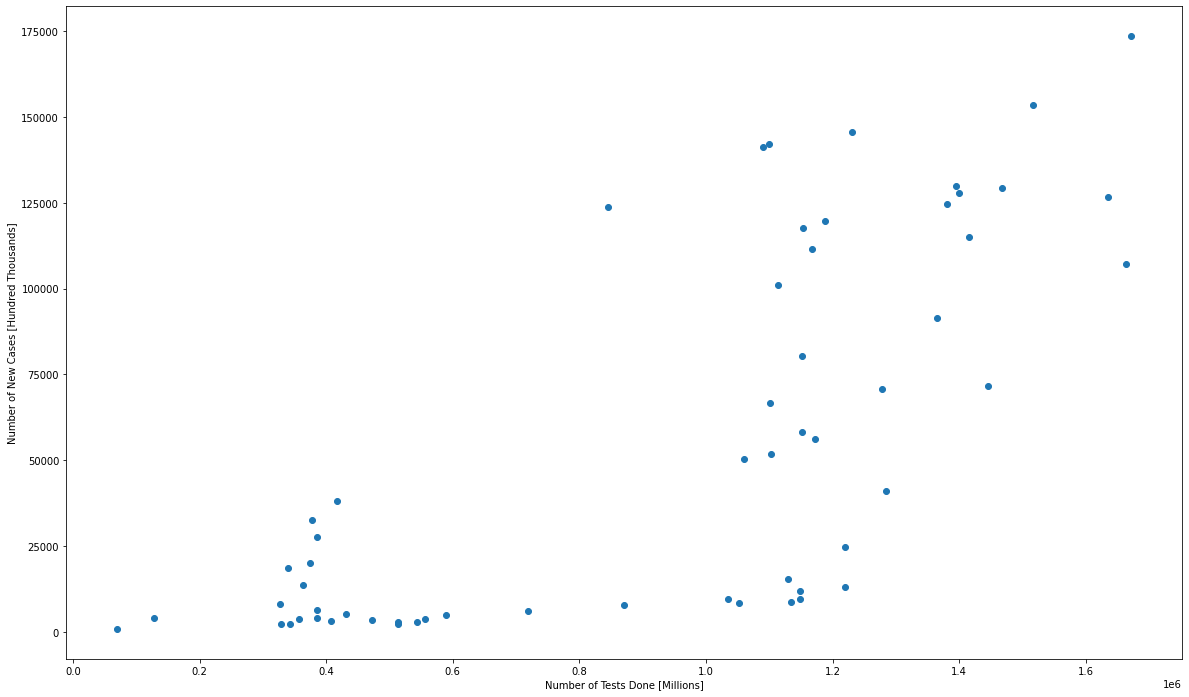

Pearsons correlation: 0.735


In [ ]:
#We also wanted to calculate the Pearson's Correlation Coefficient for the Number of Tests and the Number of New Cases
from scipy.stats import pearsonr
plt.scatter(testing_data['tests_done'],testing_data['new_cases'])
plt.xlabel("Number of Tests Done [Millions]")
plt.ylabel("Number of New Cases [Hundred Thousands]")
plt.show()

# calculate Pearson's correlation
corr, _ = pearsonr(testing_data['tests_done'], testing_data['new_cases'])
print('Pearsons correlation: %.3f' % corr)

As we can see, there was a pretty strong correlation between the two indicated that an increase in testing is linked to an increase in the number of cases.

## Modeling and Question Answering


### Linear Regression (Horace)

We performed Linear Regression to be able to predict the number of deaths, and then we cross-validated that using K-fold cross validation to check if the accuracy was indeed correct and around the mean.

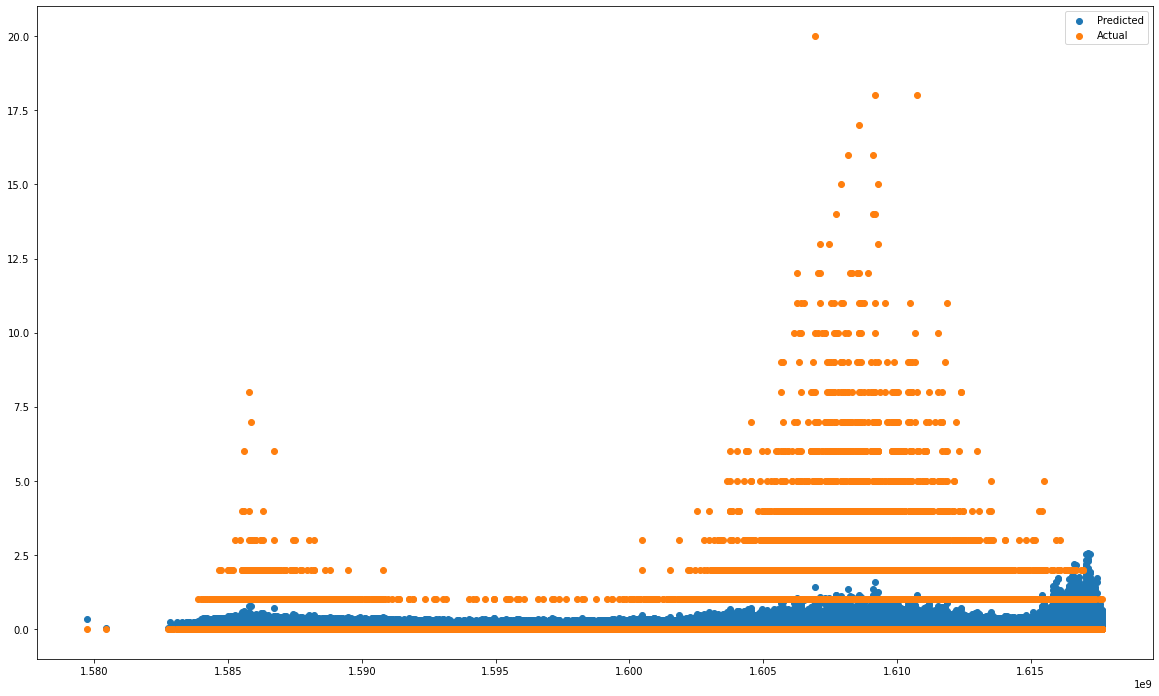

In [ ]:
# Modeling and Question Answering - Linear Regression

import time

pattern = '%Y-%m-%d'

def changeToEpochTime(x):
  return int(time.mktime(time.strptime(x, pattern)))

# Changing all non-numerical values to discrete numerical values (eg. state, county)
covidData['state'] = pd.factorize(covidData.state)[0] + 1
covidData['county'] = pd.factorize(covidData.county)[0] + 1
covidData['age_group'] = pd.factorize(covidData.age_group)[0] + 1
covidData['gender'] = pd.factorize(covidData.gender)[0] + 1

# Changing date time to epoch time to use within regression
covidData['date'] = covidData['date'].apply(changeToEpochTime)

# Separating training and testing sets
trainX = covidData.drop(['deaths'], axis=1)[:int(0.8 * len(covidData))].to_numpy()
trainY = covidData['deaths'][:int(0.8 * len(covidData))].to_numpy()
testX = covidData.drop(['deaths'], axis=1)[int(0.8 * len(covidData)):].to_numpy()
testY = covidData['deaths'][int(0.8 * len(covidData)):].to_numpy()

from sklearn.linear_model import LinearRegression

# Modelling and predicting deaths using Linear Regression
model = LinearRegression().fit(trainX, trainY)
predictedDeaths = model.predict(testX)

for i in range(len(predictedDeaths)):
  if predictedDeaths[i] < 0:
    predictedDeaths[i] = 0

# Plotting the predicted and actual tests
plt.scatter(covidData['date'][int(0.8 * len(covidData)):], predictedDeaths, label="Predicted")
plt.scatter(covidData['date'][int(0.8 * len(covidData)):], testY, label="Actual")
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error

print("The prediction accuracy was: " + str(int(model.score(testX, testY)*100)) + "%")

# Getting the RMSE of predicted and actual values
rms = mean_squared_error(testY, predictedDeaths, squared=False)
print("Root Mean Squared Error: " + str(rms))

The prediction accuracy was: 15%
Root Mean Squared Error: 0.5614302809499507


The prediction accuracy was low, corresponding to the RMSE (which is not very low indicating a poor fit). The prediction accuracy is calculated using the R^2 method, therefore indicating that both the relative fit and the absolute fit (RMSE) were low.

Furthermore, a low accuracy or high RMSE signifies that the prediction does not exactly match the test values. This is because the region that a person lives in, their age and gender, and the number of cases and recoveries does not necessarily determine the number of deaths. Furthermore, it is extremely hard to predict exactly how many deaths would occur, which ends up decreasing the accuracy.

In [ ]:
# K-fold Cross Validation on Linear Regression

from sklearn import model_selection
from sklearn.model_selection import KFold

kfold = model_selection.KFold(n_splits=2)
results_kfold = model_selection.cross_val_score(LinearRegression(), covidData.drop(['deaths'], axis=1).to_numpy(), covidData['deaths'].to_numpy(), cv=kfold)
print("The mean accuracy for the k-fold cross validation model was: " + str(int(results_kfold.mean()*100)) + "%")

The mean accuracy for the k-fold cross validation model was: 13%


The K-fold (we used 2 folds) cross validation accuracy ended up being lower than the holdout validation accuracy. This means that the mean performance was not as good as the holdout test, and that the holdout validation actually performed better than the mean performance of the cross validation sets.

### Logistic Regression (Nikhil)

In [ ]:
tempCovid = covidData
a = covidData[covidData["deaths"]<1]
b = covidData[covidData["deaths"]>=1]
a = a.sample(n=len(b))
covidData = a.append(b)

In [ ]:
#Logistic Regression Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

#Change Deaths to 0, or 1. 0 if no deaths, 1 if 1 or more deaths
def changeDeaths(x):
  if x >= 1:
    return 1
  else:
    return 0

covidData["deaths"] = covidData["deaths"].apply(changeDeaths) #predict death or not death

#set up params
y = covidData["deaths"]
X = covidData.drop(['deaths'], axis=1)

#split data
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=1)

#scale data
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#train data
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

#predict data
y_pred = log_reg.predict(x_test)

#metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88     13257
           1       0.86      0.91      0.88     13123

    accuracy                           0.88     26380
   macro avg       0.88      0.88      0.88     26380
weighted avg       0.88      0.88      0.88     26380



In [ ]:
covidData = tempCovid

The Logistic Regression Classifier performed extremly well as it has a very high f1-score, precision, and recall.


In [ ]:
# K-fold Cross Validation on Logistic Regression

from sklearn import model_selection
from sklearn.model_selection import KFold

kfold = model_selection.KFold(n_splits=2)
results_kfold = model_selection.cross_val_score(LogisticRegression(), covidData.drop(['deaths'], axis=1).to_numpy(), covidData['deaths'].to_numpy(), cv=kfold)
print("The mean accuracy for the k-fold cross validation model was: " + str(int(results_kfold.mean()*100)) + "%")

The mean accuracy for the k-fold cross validation model was: 92%


This is a very good k-fold cross test, meaning that our model has done a great job with the prediction on the data. Our model was slightly lower than the k-fold accuracy, as it was 88%, while the k-fold was 92%. Overall the values are close so it seems that the model accuracy is proper.


### KNN (Nikhil)

In [ ]:
#KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

#split data
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=1)

#scale data
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#train classifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)

#predict values
y_pred = classifier.predict(x_test)

#get Evals
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     13257
           1       0.91      0.93      0.92     13123

    accuracy                           0.92     26380
   macro avg       0.92      0.92      0.92     26380
weighted avg       0.92      0.92      0.92     26380



The KNN Classifier performed extremly well as it has a very high f1-score, precision, and recall.

In [ ]:
# K-fold Cross Validation on KNN Classifier

from sklearn import model_selection
from sklearn.model_selection import KFold

kfold = model_selection.KFold(n_splits=2)
results_kfold = model_selection.cross_val_score(KNeighborsClassifier(), covidData.drop(['deaths'], axis=1).to_numpy(), covidData['deaths'].to_numpy(), cv=kfold)
print("The mean accuracy for the k-fold cross validation model was: " + str(int(results_kfold.mean()*100)) + "%")

The mean accuracy for the k-fold cross validation model was: 91%


Our model's accuracy was slightly higher than the k-fold accuracy, as it was 92%, while the k-fold was 91%. Overall the values are close so it seems that the model accuracy is proper.